<a href="https://colab.research.google.com/github/SorayaFrancoLopez/NN_churn_proyect_insurance/blob/main/STEP_1_Analisis_Exploratorio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, plotly.express as px, plotly.graph_objects as go
from plotly.subplots import make_subplots
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, precision_recall_curve

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Cargamos los datos sin ninguna modificación. Raw.
df = pd.read_csv("/content/drive/MyDrive/Churn Rate Algorithm/datos_raw.csv", delimiter=',', encoding='latin1')

In [4]:
#Importamos las funciones creadas para analizar los datos
import sys
sys.path.append('/content/drive/MyDrive/Churn Rate Algorithm')
import funciones

In [5]:
df.head()

,MEDCOD,Edad,AnosCliente,ConGestorSubAgente,ConGestorAsignado,sCodProvincia,sCodPostal,sNomEstadoCivil,Dominio,SEXO,...,NumeRecibos_Menos3,PrimasPagadas_Menos3,Num_Siniestros_Menos3,Num_Pol_Vigor_Hogar_Menos3,Num_Pol_Vigor_Autos_Menos3,Num_Pol_Vigor_Decesos_Menos3,Num_Pol_Vigor_Salud_Menos3,Num_Pol_Vigor_PensionesVida_Menos3,Num_Pol_Vigor_Resto_Menos3,EsBaja
0,GES000000002,68,27,0,0,24,24,4,0,3,...,1,327.93,0,0,1,0,0,0,0,0
1,GES000000004,77,30,0,0,24,24,1,1,1,...,9,1576.00,0,0,1,0,0,0,1,0
2,GES000000005,67,27,0,0,24,24,4,1,3,...,1,607.10,0,0,0,0,0,0,1,0
3,GES000000010,64,27,0,0,24,24,1,1,2,...,1,235.05,0,0,0,0,0,0,1,0
4,GES000000017,66,26,0,0,24,24,1,1,3,...,2,412.94,0,0,1,0,0,0,0,0


In [6]:
df.columns

Index(['MEDCOD', 'Edad', 'AnosCliente', 'ConGestorSubAgente',
       'ConGestorAsignado', 'sCodProvincia', 'sCodPostal', 'sNomEstadoCivil',
       'Dominio', 'SEXO', 'TipoPersona', 'Num_Pol_Vigor_Menos0',
       'NumeRecibos_Menos0', 'PrimasPagadas_Menos0', 'Num_Siniestros_Menos0',
       'Num_Pol_Vigor_Hogar_Menos0', 'Num_Pol_Vigor_Autos_Menos0',
       'Num_Pol_Vigor_Decesos_Menos0', 'Num_Pol_Vigor_Salud_Menos0',
       'Num_Pol_Vigor_PensionesVida_Menos0', 'Num_Pol_Vigor_Resto_Menos0',
       'Num_Pol_Vigor_Menos1', 'NumeRecibos_Menos1', 'PrimasPagadas_Menos1',
       'Num_Siniestros_Menos1', 'Num_Pol_Vigor_Hogar_Menos1',
       'Num_Pol_Vigor_Autos_Menos1', 'Num_Pol_Vigor_Decesos_Menos1',
       'Num_Pol_Vigor_Salud_Menos1', 'Num_Pol_Vigor_PensionesVida_Menos1',
       'Num_Pol_Vigor_Resto_Menos1', 'Num_Pol_Vigor_Menos2',
       'NumeRecibos_Menos2', 'PrimasPagadas_Menos2', 'Num_Siniestros_Menos2',
       'Num_Pol_Vigor_Hogar_Menos2', 'Num_Pol_Vigor_Autos_Menos2',
       'Num_Pol_V

In [7]:
columnas_repetidas = df.columns[df.columns.duplicated()]
if len(columnas_repetidas) > 0:
    print("Hay columnas repetidas:", columnas_repetidas)
else:
    print("No hay columnas repetidas.")

No hay columnas repetidas.


In [8]:
num_filas, num_columnas = df.shape
print("Número de filas:", num_filas)
print("Número de columnas:", num_columnas)

Número de filas: 11396
Número de columnas: 52


In [9]:
# Eliminar los registros por encima de 20000 y los registros negativos
"""Esta decision se ha tomado en base a el analisis que se ha hecho anteriormente y para poder observar mejor las gráficas. """
df = df.loc[(df['PrimasPagadas_Menos0'] <= 20000) & (df['PrimasPagadas_Menos0'] >= 0) &
            (df['PrimasPagadas_Menos1'] <= 20000) & (df['PrimasPagadas_Menos1'] >= 0) &
            (df['PrimasPagadas_Menos2'] <= 20000) & (df['PrimasPagadas_Menos2'] >= 0) &
            (df['PrimasPagadas_Menos3'] <= 20000) & (df['PrimasPagadas_Menos3'] >= 0)]

Más adelante en el análisis de estos datos, hemos observado algunos valores que están fuera de lo común. Por consiguiente, se ha tomado la decisión de eliminarlos. La pérdida de datos resultante representa  1,33% de los registros. Esta acción se lleva a cabo con el propósito de hacer que los datos sean más homogéneos, lo que permitirá que los modelos futuros puedan generalizar mucho mejor.

El motivo de incluir este código aquí es facilitar una visualización más clara, evitando así que estos datos atípicos generen ruidos innecesarios.

In [10]:
num_filas1, num_columnas1 = df.shape
eliminadas = num_filas - num_filas1
print("Número de filas despues de eliminar:", num_filas1)
print("Número de columnas despues de eliminar:", num_columnas1)
print("Total eliminado:", eliminadas)

Número de filas despues de eliminar: 11244
Número de columnas despues de eliminar: 52
Total eliminado: 152


Hemos eliminado tan solo el 1.33%

#Analisis de la columna 'EsBaja'
Columna target.

In [11]:
funciones.analizar_columna(df, 'EsBaja')

[0, 1]

Valor '0': 10128 registros

Valor '1': 1116 registros

0    90.074707
1     9.925293
Name: EsBaja, dtype: float64


En nuestra variable target el 90.07% de los datos corresponden a la categoría 0 de la variable 'EsBaja', lo que significa que la mayoría de los registros no están clasificados como baja. Solo el 9.92% de los datos se clasifican como baja. En este punto, es importante considerar el equilibrio de clases para mejorar el proceso de entrenamiento más adelante.

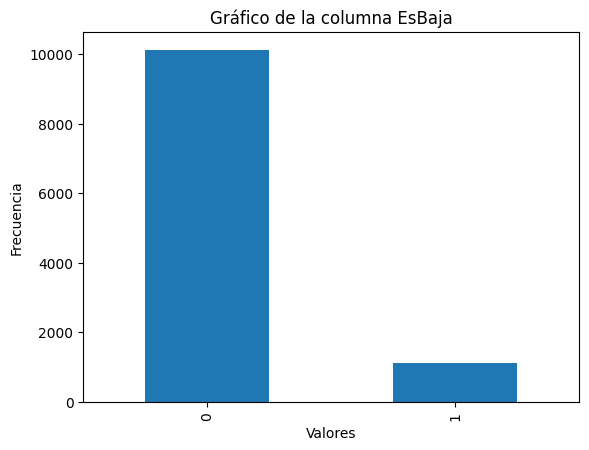

In [12]:
df['EsBaja'].value_counts().plot(kind='bar')
plt.title('Gráfico de la columna EsBaja')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.show()

In [13]:
# datos faltantes en cada columna
datos_faltantes_por_columna = df.isna().sum()

# datos faltantes en todo el DataFrame
total_datos_faltantes = datos_faltantes_por_columna.sum()

print("Número de datos faltantes por columna:")
print(datos_faltantes_por_columna)
print("\nTotal de datos faltantes en el DataFrame:", total_datos_faltantes)

Número de datos faltantes por columna:
MEDCOD                                0
Edad                                  0
AnosCliente                           0
ConGestorSubAgente                    0
ConGestorAsignado                     0
sCodProvincia                         0
sCodPostal                            0
sNomEstadoCivil                       0
Dominio                               0
SEXO                                  0
TipoPersona                           0
Num_Pol_Vigor_Menos0                  0
NumeRecibos_Menos0                    0
PrimasPagadas_Menos0                  0
Num_Siniestros_Menos0                 0
Num_Pol_Vigor_Hogar_Menos0            0
Num_Pol_Vigor_Autos_Menos0            0
Num_Pol_Vigor_Decesos_Menos0          0
Num_Pol_Vigor_Salud_Menos0            0
Num_Pol_Vigor_PensionesVida_Menos0    0
Num_Pol_Vigor_Resto_Menos0            0
Num_Pol_Vigor_Menos1                  0
NumeRecibos_Menos1                    0
PrimasPagadas_Menos1                  0
N

No se observa ningún dato faltante en cada una de las columnas por lo que no es necesario hacer imputación de nulos.

In [14]:
print(df.dtypes)

MEDCOD                                 object
Edad                                    int64
AnosCliente                             int64
ConGestorSubAgente                      int64
ConGestorAsignado                       int64
sCodProvincia                           int64
sCodPostal                              int64
sNomEstadoCivil                         int64
Dominio                                 int64
SEXO                                    int64
TipoPersona                             int64
Num_Pol_Vigor_Menos0                    int64
NumeRecibos_Menos0                      int64
PrimasPagadas_Menos0                  float64
Num_Siniestros_Menos0                   int64
Num_Pol_Vigor_Hogar_Menos0              int64
Num_Pol_Vigor_Autos_Menos0              int64
Num_Pol_Vigor_Decesos_Menos0            int64
Num_Pol_Vigor_Salud_Menos0              int64
Num_Pol_Vigor_PensionesVida_Menos0      int64
Num_Pol_Vigor_Resto_Menos0              int64
Num_Pol_Vigor_Menos1              

In [15]:
# Ignoramos la columna 'MEDCOD'
columnas = df.columns[df.columns != 'MEDCOD']

for columna in columnas:
    if df[columna].dtype == 'object':
        continue

    if set(df[columna].unique()) == {0, 1}:
        df[columna] = df[columna].astype(bool)
    elif all(isinstance(x, int) for x in df[columna]):
        df[columna] = df[columna].astype(int)
    else:
        df[columna] = df[columna].astype(float)

In [16]:
print(df.dtypes)

MEDCOD                                 object
Edad                                    int64
AnosCliente                             int64
ConGestorSubAgente                       bool
ConGestorAsignado                        bool
sCodProvincia                           int64
sCodPostal                              int64
sNomEstadoCivil                         int64
Dominio                                  bool
SEXO                                    int64
TipoPersona                              bool
Num_Pol_Vigor_Menos0                    int64
NumeRecibos_Menos0                      int64
PrimasPagadas_Menos0                  float64
Num_Siniestros_Menos0                   int64
Num_Pol_Vigor_Hogar_Menos0               bool
Num_Pol_Vigor_Autos_Menos0               bool
Num_Pol_Vigor_Decesos_Menos0             bool
Num_Pol_Vigor_Salud_Menos0               bool
Num_Pol_Vigor_PensionesVida_Menos0       bool
Num_Pol_Vigor_Resto_Menos0               bool
Num_Pol_Vigor_Menos1              

Los cambios en el tipo de dato se ha realizado según este criterio:

**Optimización de memoria**: Utilizar tipos de datos más específicos y ajustados a los valores que realmente contiene cada columna puede ayudar a reducir el uso de memoria.

**Claridad y legibilidad del código**: Al utilizar tipos de datos adecuados, el código se vuelve más claro y fácil de entender para otros desarrolladores que puedan leerlo en el futuro.

**Compatibilidad con funciones y métodos específicos**: Al utilizar los tipos de datos correctos, se pueden aprovechar las funciones y métodos específicos de cada tipo de dato.

<ipython-input-17-aa289f43821a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


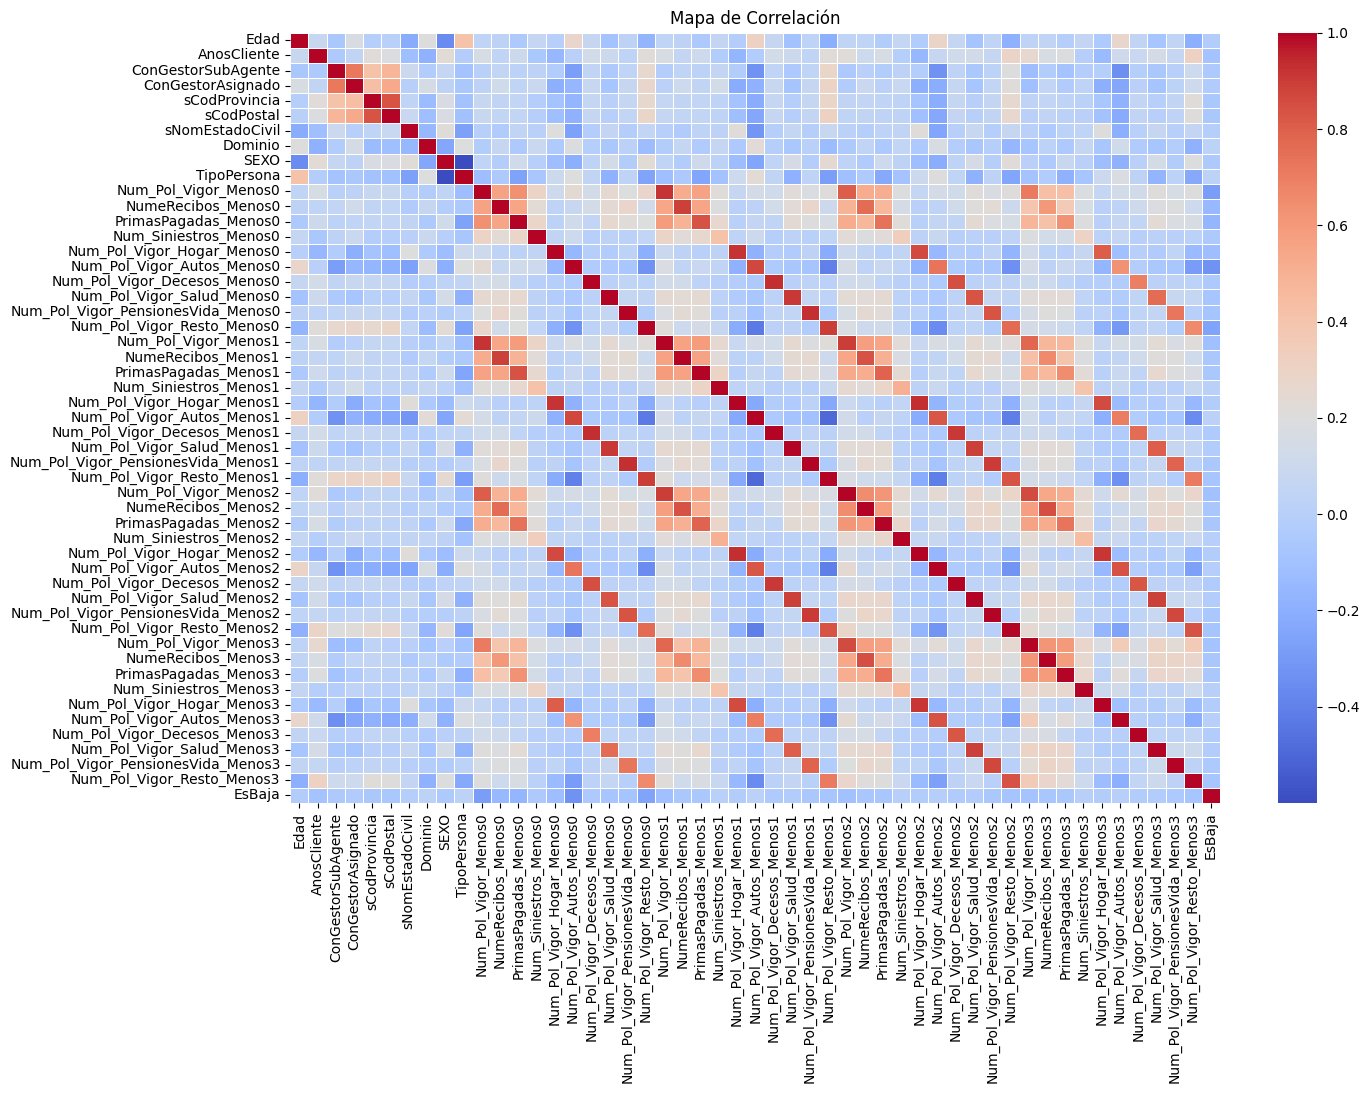

In [17]:
# matriz de correlación
correlation_matrix = df.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Mapa de Correlación')
plt.show()

Esta matriz ilustra la relación entre cada variable, mostrando tanto la fuerza como la dirección de estas relaciones. Los valores de correlación varían entre -1 (indicado por azul) y 1 (indicado por rojo): -1 representa una correlación negativa perfecta, 1 una correlación positiva perfecta, y 0 la ausencia de correlación. Una matriz de correlación es útil para detectar patrones y dependencias entre las variables.

Al eliminar los valores atípicos, la matriz de correlación ha experimentado cambios, mostrando ahora un patrón más coherente. Se observa claramente cómo el grupo de variables X_Menos0, X_Menos1, X_Menos2 y X_Menos3 (donde X representa el número de póliza en vigor y su tipo) se relacionan positivamente entre sí. Es decir, cuando una variable aumenta, las demás también tienden a aumentar.

#ANALISIS COLUMNA A COLUMNA

#Columna 'MEDCOD'

In [18]:
df['MEDCOD']

0        GES000000002
1        GES000000004
2        GES000000005
3        GES000000010
4        GES000000017
             ...     
11391    IDR000009193
11392    IDR000009226
11393    IDR000009273
11394    IDR000009399
11395    IDR000009471
Name: MEDCOD, Length: 11244, dtype: object

In [19]:
# Obtener los primeros 4 caracteres de la columna 'MEDCOD' para identificar los grupos.
df['grupo'] = df['MEDCOD'].str[:4]

cantidad_por_grupo = df['grupo'].value_counts()

print("Cantidad de registros por grupo:")
print(cantidad_por_grupo)

Cantidad de registros por grupo:
IDR0    3324
TUR0    3081
ALC0    2937
GES0    1902
Name: grupo, dtype: int64


Cada uno de estos representa un tipo de cliente distinto que forman grupos homogeneos. Para facilitar el análisis he decidido agruparlos.

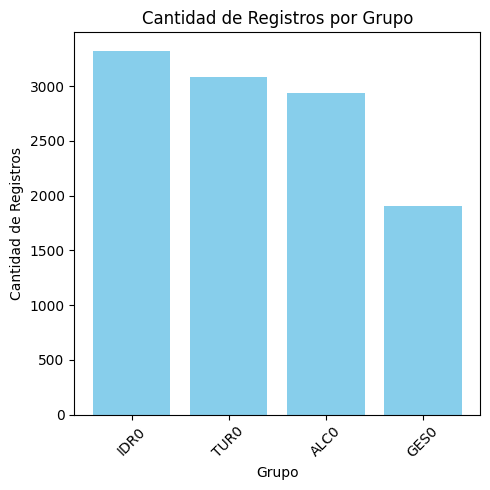

In [20]:
grupos = cantidad_por_grupo.index
cantidad = cantidad_por_grupo.values

plt.figure(figsize=(5, 5))
plt.bar(grupos, cantidad, color='skyblue')

plt.xlabel('Grupo')
plt.ylabel('Cantidad de Registros')
plt.title('Cantidad de Registros por Grupo')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

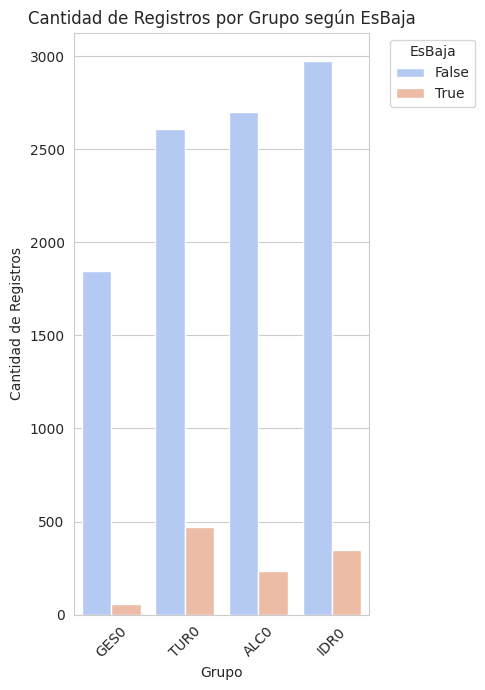

In [21]:
sns.set_style("whitegrid")

plt.figure(figsize=(5, 7))
sns.countplot(data=df, x='grupo', hue='EsBaja', palette='coolwarm')

plt.xlabel('Grupo')
plt.ylabel('Cantidad de Registros')
plt.title('Cantidad de Registros por Grupo según EsBaja')

plt.legend(title='EsBaja', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Aquí observamos la cantidad de bajas según el tipo de cliente que hay.

In [22]:
grupo_df = df.groupby('grupo')['EsBaja'].value_counts().unstack(fill_value=0)

grupo_df['Total'] = grupo_df.sum(axis=1)

grupo_df['Porcentaje Baja'] = (grupo_df[True] / grupo_df['Total']) * 100
grupo_df['Porcentaje No Baja'] = (grupo_df[False] / grupo_df['Total']) * 100

grupo_df.drop(columns=[True, False], inplace=True)

print(grupo_df)

EsBaja  Total  Porcentaje Baja  Porcentaje No Baja
grupo                                             
ALC0     2937         8.069459           91.930541
GES0     1902         3.049422           96.950578
IDR0     3324        10.469314           89.530686
TUR0     3081        15.352158           84.647842


Podemos determinar que el grupo IDR0 es el que más porcentaje de bajas tiene.

#Columna 'Edad'

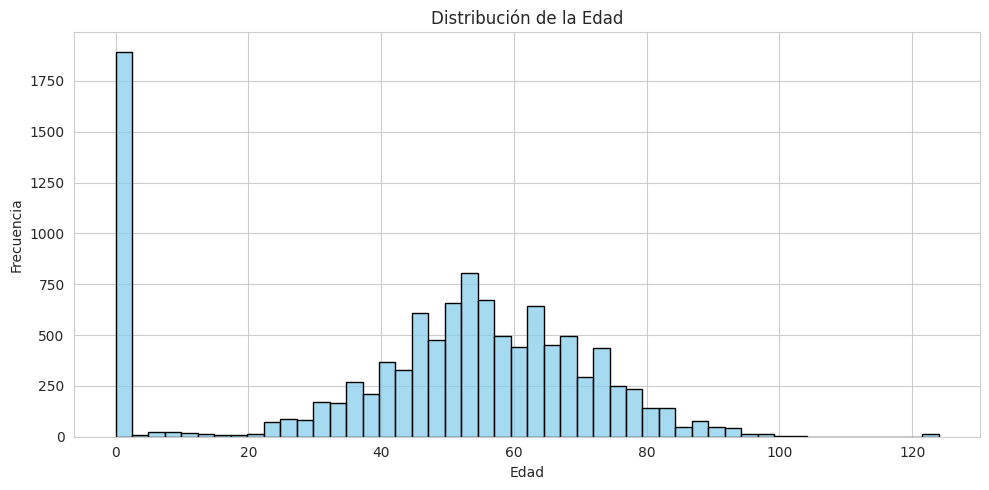

In [23]:
sns.set_style("whitegrid")

# histograma de edad
plt.figure(figsize=(10, 5))
sns.histplot(df['Edad'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Edad')
plt.tight_layout()
plt.show()

En la columna de edad, se observan algunas inconsistencias que posiblemente sean errores. En primer lugar, la gran mayoría de registros se encuentran en el grupo de 0, lo cual es improbable e indicativo de un error al ingresar los datos. Además, se encuentran edades que no son realistas, como menores de 16 años o mayores de 100. Dado el gran número de registros afectados, será necesario abordar esta situación de manera diferente.

In [24]:
funciones.analizar_columna(df, 'Edad')

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 103, 105, 123, 124]

Valor '0': 1892 registros

Valor '1': 1 registros

Valor '2': 1 registros

Valor '3': 5 registros

Valor '4': 5 registros

Valor '5': 10 registros

Valor '6': 8 registros

Valor '7': 6 registros

Valor '8': 12 registros

Valor '9': 9 registros

Valor '10': 6 registros

Valor '11': 6 registros

Valor '12': 6 registros

Valor '13': 2 registros

Valor '14': 9 registros

Valor '15': 7 registros

Valor '16': 2 registros

Valor '17': 1 registros

Valor '18': 7 registros

Valor '19': 1 registros

Valor '21': 5 registros

Valor '22': 10 registros

Valor '23': 16 registros

Valor '24'

In [25]:
# Convertir valores mayores que 90 o menores que 16 en 0
df.loc[(df['Edad'] > 90) | (df['Edad'] < 16), 'Edad'] = 0

ceros = (df['Edad'] == 0).sum()
print("Cantidad de valores cero en la columna 'Edad':", ceros)

Cantidad de valores cero en la columna 'Edad': 2098


Convertiremos los valores de edad mayores de 90 años y menores de 16 en cero para agruparlos con los valores faltantes (NaN). En términos prácticos, consideraremos que el valor cero representa valores nulos y los trataremos como tales.

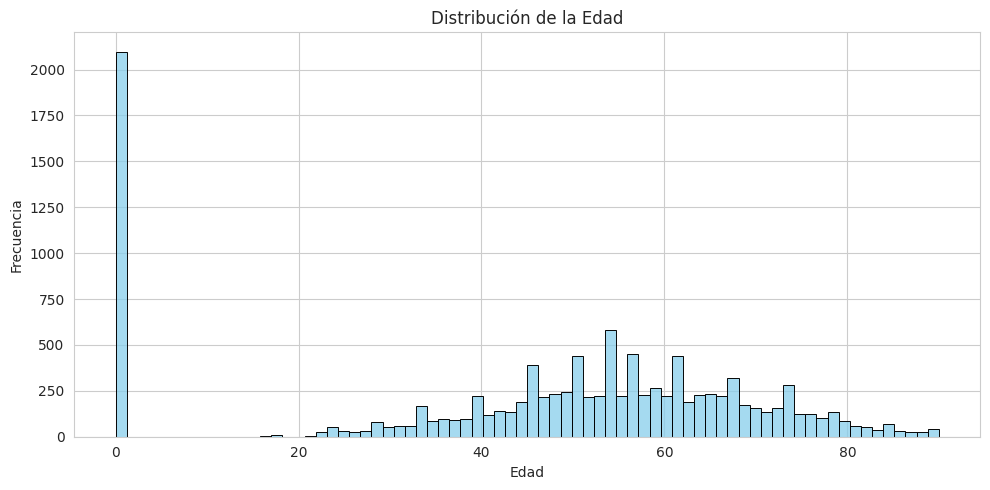

In [26]:
sns.set_style("whitegrid")

# histograma
plt.figure(figsize=(10, 5))
sns.histplot(df['Edad'], bins=74, color='skyblue', edgecolor='black')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Edad')
plt.tight_layout()
plt.show()

In [27]:
print(df['Edad'].describe())

# Contar la frecuencia de cada valor en la columna 'Edad'
frecuencia_edades = df['Edad'].value_counts()
# frecuencia más alta
valores_mas_comunes = frecuencia_edades[frecuencia_edades == frecuencia_edades.max()]
print("Valores que más se repiten en la columna 'Edad':")
print(valores_mas_comunes)

count    11244.000000
mean        45.717360
std         25.159394
min          0.000000
25%         36.000000
50%         53.000000
75%         63.000000
max         90.000000
Name: Edad, dtype: float64
Valores que más se repiten en la columna 'Edad':
0    2098
Name: Edad, dtype: int64


La columna 'Edad' cuenta con un total de 11244 registros. La edad promedio es de aproximadamente 45.72 años, con una desviación estándar de alrededor de 25.16 años. La edad mínima registrada es de 0 años, lo cual puede indicar posibles errores en la entrada de datos o la presencia de valores faltantes representados como cero. Los percentiles muestran que el 25% de las edades son menores o iguales a 36 años, el 50% son menores o iguales a 53 años (mediana), y el 75% son menores o iguales a 63 años. La edad máxima registrada es de 90 años. Además, se observa que el valor que más se repite en la columna 'Edad' es 0, con una frecuencia de 2098 veces.

Por lo tanto, no podemos borrar los datos en los que la columna Edad sea 0, la perdida de los datos sería demasiado.

Conservar los valores 0 distorsiona los datos obtenidos. Por lo tanto, se distribuirán los valores 0 entre las edades comprendidas entre 16 y 90 años. Aunque esta acción no refleje totalmente la realidad, su influencia en el resultado final será mínima y aceptable.

In [28]:
# Iteramos sobre las filas de en la columna Edad, cuando el valor sea 0 lo cambiamos a un número en rango 16 a 90.
rango_edad = list(range(16, 91))

indice_edad = 0

for index, row in df.iterrows():

    if row['Edad'] == 0:
        df.at[index, 'Edad'] = rango_edad[indice_edad]
        indice_edad = (indice_edad + 1) % len(rango_edad)

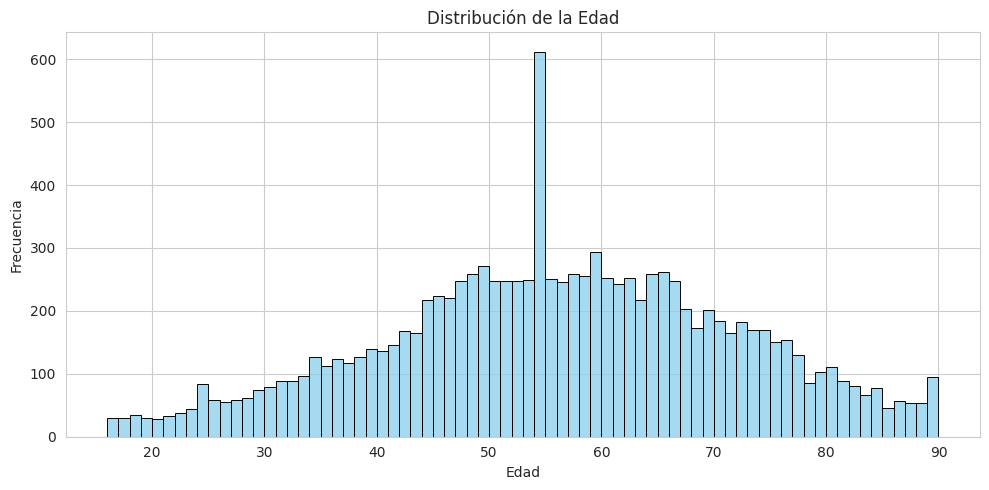

In [29]:
sns.set_style("whitegrid")

# Crear el histograma con Seaborn
plt.figure(figsize=(10, 5))
sns.histplot(df['Edad'], bins=74, color='skyblue', edgecolor='black')

# Añadir etiquetas y título
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Edad')

# Mostrar el histograma
plt.tight_layout()
plt.show()

El histograma exhibe una distribución simétrica, típicamente conocida como "distribución normal" o "distribución gaussiana". En esta distribución, la mayoría de los datos se agrupan alrededor de la media, y la dispersión de los datos es simétrica respecto a ella.

A pesar de que el valor que duplica en cantidad es 54, lo cual tiene sentido considerando la aplicación previa de la media de edad a los datos atípicos, los resultados siguen siendo confiables y adecuados para el entrenamiento de un modelo de inteligencia artificial.

In [30]:
print(df['Edad'].describe())

# Contar la frecuencia de cada valor en la columna 'Edad'
frecuencia_edades = df['Edad'].value_counts()
# frecuencia más alta
valores_mas_comunes = frecuencia_edades[frecuencia_edades == frecuencia_edades.max()]
print("Valores que más se repiten en la columna 'Edad':")
print(valores_mas_comunes)

count    11244.000000
mean        55.600053
std         15.569335
min         16.000000
25%         46.000000
50%         55.000000
75%         66.000000
max         90.000000
Name: Edad, dtype: float64
Valores que más se repiten en la columna 'Edad':
54    612
Name: Edad, dtype: int64


La columna 'Edad' cuenta con un total de 11244 registros. La edad promedio es de aproximadamente 55.60 años, con una desviación estándar de alrededor de 15.57 años. La edad mínima registrada es de 16 años y la máxima es de 90 años. Los percentiles muestran que el 25% de las edades son menores o iguales a 46 años, el 50% son menores o iguales a 55 años (mediana), y el 75% son menores o iguales a 66 años. El valor que más se repite en la columna 'Edad' es 54, con una frecuencia de 612 veces.

El valor 54 representa aproximadamente el 5.44% de los 11244 registros.

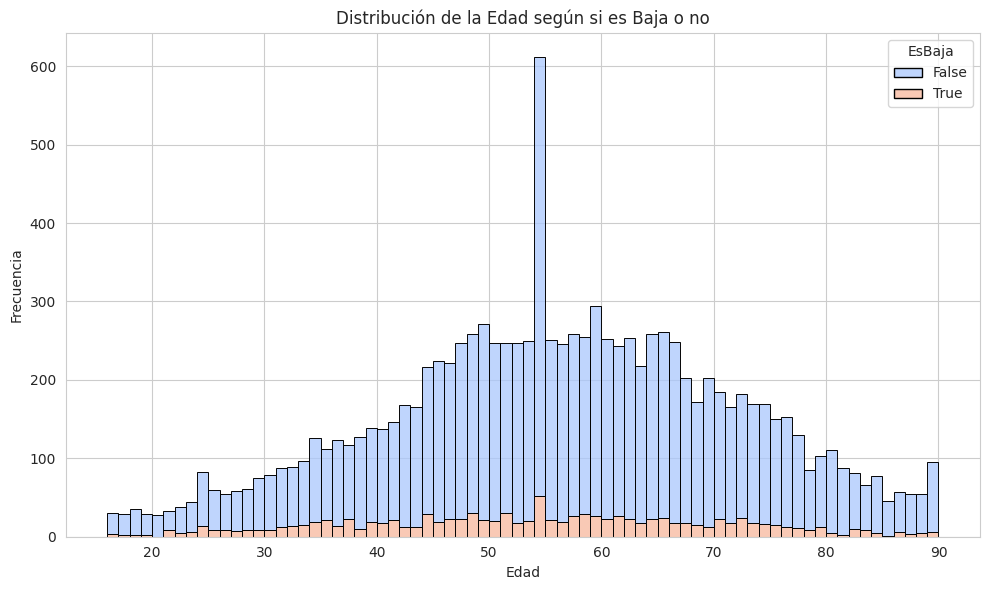

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Edad', bins=74, hue='EsBaja', palette='coolwarm', multiple='stack', edgecolor='black')

plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Edad según si es Baja o no')

plt.tight_layout()
plt.show()

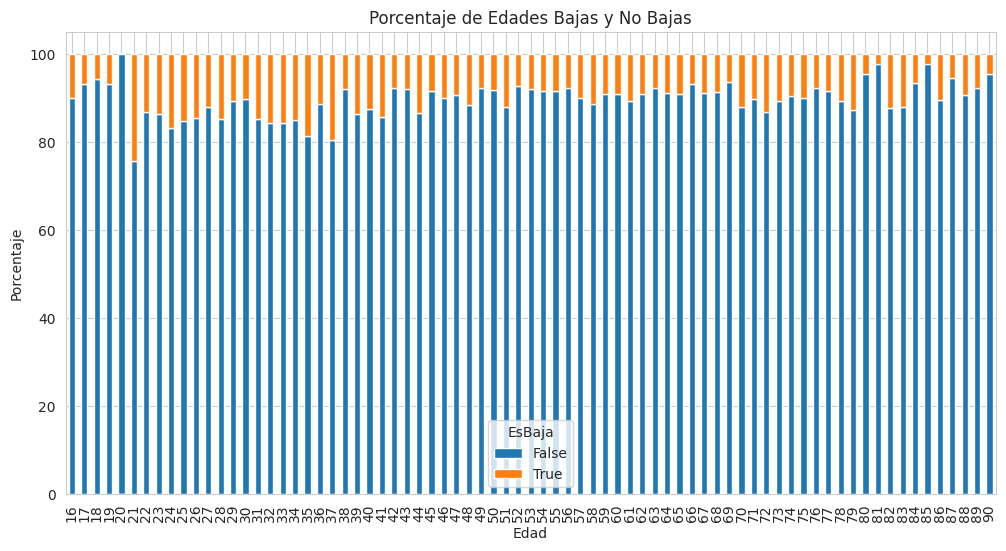

In [32]:
# Calcular el conteo de cada valor en la columna 'Edad' para cada categoría de 'EsBaja'
conteo_por_edad = df.groupby(['Edad', 'EsBaja']).size().unstack(fill_value=0)

porcentaje_por_edad = conteo_por_edad.div(conteo_por_edad.sum(axis=1), axis=0) * 100
fig, ax = plt.subplots(figsize=(12, 6))
porcentaje_por_edad.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Porcentaje de Edades Bajas y No Bajas')
ax.set_xlabel('Edad')
ax.set_ylabel('Porcentaje')
ax.legend(title='EsBaja')
plt.show()

En cuanto al porcentaje de bajas por edad, destaca que la edad de 20 años registra el mayor número de bajas. Además, al observar visualmente, notamos que la primera franja de edades, de 16 a 40 años, presenta un porcentaje de bajas más elevado.

#Columna 'AnosCliente'

Esta columna representa el número de años que un cliente lleva en la compañia.

In [33]:
funciones.analizar_columna(df, 'AnosCliente')

[-76, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]

Valor '-76': 1 registros

Valor '0': 10 registros

Valor '1': 96 registros

Valor '2': 90 registros

Valor '3': 1674 registros

Valor '4': 1201 registros

Valor '5': 1694 registros

Valor '6': 2863 registros

Valor '7': 585 registros

Valor '8': 901 registros

Valor '9': 201 registros

Valor '10': 246 registros

Valor '11': 161 registros

Valor '12': 136 registros

Valor '13': 133 registros

Valor '14': 140 registros

Valor '15': 115 registros

Valor '16': 82 registros

Valor '17': 44 registros

Valor '18': 59 registros

Valor '19': 46 registros

Valor '20': 61 registros

Valor '21': 41 registros

Valor '22': 52 registros

Valor '23': 58 registros

Valor '24': 55 registros

Valor '25': 65 registros

Valor '26': 129 registros

Valor '27': 94 registros

Valor '28': 79 registros

Valor '29': 47 registros

Valor '30': 41 registros

Valor '31': 28 registro

Se ha identificado un valor atípico en los registros. El tiempo máximo que un cliente ha estado en la compañía es de 34 años. Al analizar la distribución de la duración de la relación con la compañía, se observa que la mayoría de los clientes tienen una antigüedad entre 3 y 6 años.

In [34]:
# Imputamos el valor atipico -76 con su media
media_anos_cliente = df[df['AnosCliente'] != -76]['AnosCliente'].mean()
media_anos_cliente = np.ceil(media_anos_cliente)
df['AnosCliente'] = df['AnosCliente'].apply(lambda x: media_anos_cliente if x == -76 else x)

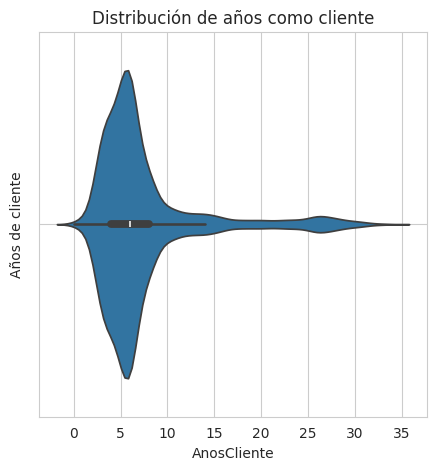

In [35]:
plt.figure(figsize=(5, 5))
sns.violinplot(x=df['AnosCliente'])
plt.title('Distribución de años como cliente')
plt.ylabel('Años de cliente')
plt.grid(True)
plt.show()

El grueso de los clientes está en torno a los 3 y 6 años de antigüedad.

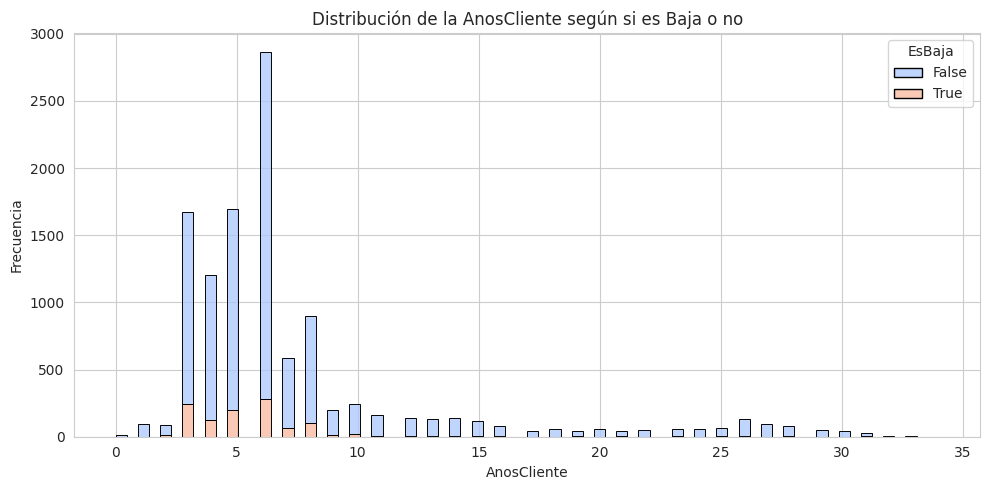

In [36]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='AnosCliente', bins=74, hue='EsBaja', palette='coolwarm', multiple='stack', edgecolor='black')

plt.xlabel('AnosCliente')
plt.ylabel('Frecuencia')
plt.title('Distribución de la AnosCliente según si es Baja o no')

plt.tight_layout()
plt.show()

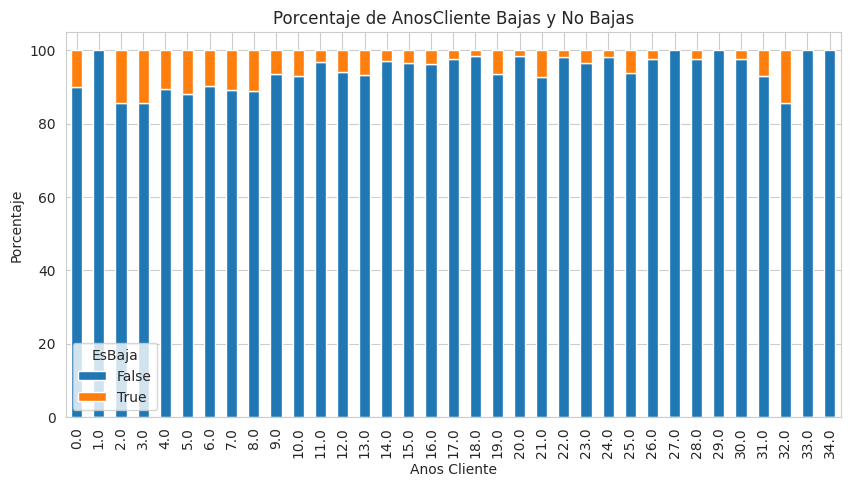

In [37]:
conteo_por_edad = df.groupby(['AnosCliente', 'EsBaja']).size().unstack(fill_value=0)

porcentaje_por_edad = conteo_por_edad.div(conteo_por_edad.sum(axis=1), axis=0) * 100

fig, ax = plt.subplots(figsize=(10, 5))
porcentaje_por_edad.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Porcentaje de AnosCliente Bajas y No Bajas')
ax.set_xlabel('Anos Cliente')
ax.set_ylabel('Porcentaje')
ax.legend(title='EsBaja')
plt.show()

Aquí se presenta el porcentaje de abandonos según la antigüedad de los clientes en la compañía. Destaca que el grupo de clientes con 2 y 3 años de antigüedad es el más numeroso, seguido por el grupo de 31 años. Este patrón resulta bastante lógico.

#Columnas con 'ConGestorSubAgente', 'ConGestorAsignado'

In [38]:
funciones.analizar_columna(df, 'ConGestorSubAgente')

[False, True]

Valor 'False': 6844 registros

Valor 'True': 4400 registros

False    60.868018
True     39.131982
Name: ConGestorSubAgente, dtype: float64


In [39]:
funciones.analizar_columna(df, 'ConGestorAsignado')

[False, True]

Valor 'False': 8383 registros

Valor 'True': 2861 registros

False    74.555318
True     25.444682
Name: ConGestorAsignado, dtype: float64


**Para la variable 'ConGestorSubAgente':**

Hay 6844 registros con el valor 'False' y 4400 registros con el valor 'True'.
Esto representa aproximadamente el 60.87% de los registros para 'False' y el 39.13% para 'True'.

**Para la variable 'ConGestorAsignado':**

Hay 8383 registros con el valor 'False' y 2861 registros con el valor 'True'.
Esto representa aproximadamente el 74.56% de los registros para 'False' y el 25.44% para 'True'.

In [40]:
# Contar los valores únicos en ambas columnas
conteo_asignado = df['ConGestorAsignado'].value_counts()
conteo_subagente = df['ConGestorSubAgente'].value_counts()

data = {
    'ConGestorAsignado': conteo_asignado,
    'ConGestorSubAgente': conteo_subagente
}

conteo_combinado = pd.DataFrame(data)
print("Cantidad de registros con diferentes combinaciones de valores:")
print(conteo_combinado)

# Contar registros con valores 0 o 1 en ambas columnas
cantidad_00 = ((df['ConGestorAsignado'] == 0) & (df['ConGestorSubAgente'] == 0)).sum()
cantidad_01 = ((df['ConGestorAsignado'] == 0) & (df['ConGestorSubAgente'] == 1)).sum()
cantidad_10 = ((df['ConGestorAsignado'] == 1) & (df['ConGestorSubAgente'] == 0)).sum()
cantidad_11 = ((df['ConGestorAsignado'] == 1) & (df['ConGestorSubAgente'] == 1)).sum()

print("\nCantidad de registros con diferentes combinaciones de valores:")
print(f"00, No tiene ningún tipo gestor  : {cantidad_00}")
print(f"01: Tiene solo Gestor Subagente : {cantidad_01}")
print(f"10: Tiene solo Gestor Asignado : {cantidad_10}")
print(f"11: Tiene ambos gestores : {cantidad_11}")

Cantidad de registros con diferentes combinaciones de valores:
       ConGestorAsignado  ConGestorSubAgente
False               8383                6844
True                2861                4400

Cantidad de registros con diferentes combinaciones de valores:
00, No tiene ningún tipo gestor  : 6824
01: Tiene solo Gestor Subagente : 1559
10: Tiene solo Gestor Asignado : 20
11: Tiene ambos gestores : 2841


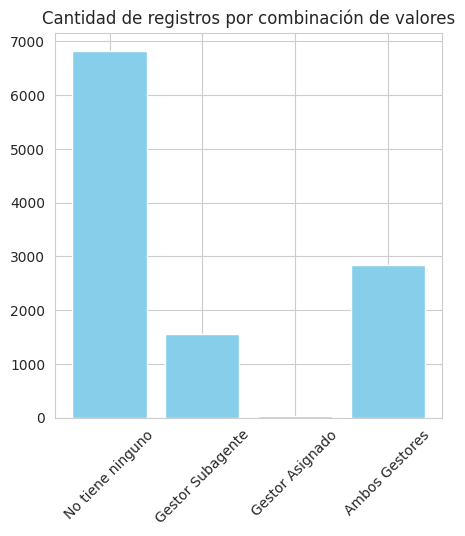

In [41]:
combinaciones = ['No tiene ninguno', 'Gestor Subagente', 'Gestor Asignado', 'Ambos Gestores']
cantidades = [cantidad_00, cantidad_01, cantidad_10, cantidad_11]

# Graficar el gráfico de barras
plt.figure(figsize=(5, 5))
plt.bar(combinaciones, cantidades, color='skyblue')
plt.title('Cantidad de registros por combinación de valores')
plt.xticks(rotation=45)
plt.show()

Prevalencia de clientes sin gestor asignado: La mayoría de los clientes en el conjunto de datos no tienen asignado ningún tipo de gestor, como lo indica la combinación '00', que cuenta con 6824 registros.

Uso frecuente del Gestor Subagente: Hay una cantidad considerable de clientes que tienen solo un Gestor Subagente asignado (1559 registros).

Poca presencia de clientes con solo Gestor Asignado: La combinación '10', que representa clientes con solo Gestor Asignado, tiene una presencia muy baja en comparación con otras combinaciones, con solo 20 registros.

Clientes con ambos gestores: La combinación '11', que indica clientes con ambos tipos de gestores asignados, es relativamente común, con 2841 registros.

Estrategia de gestión diversificada: La presencia de clientes con ambos gestores asignados sugiere una estrategia de gestión diversificada por parte de la compañía, lo que puede indicar una atención más completa y personalizada a estos clientes.

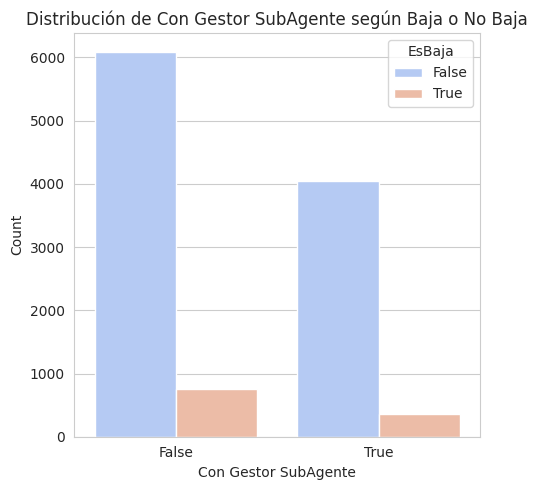

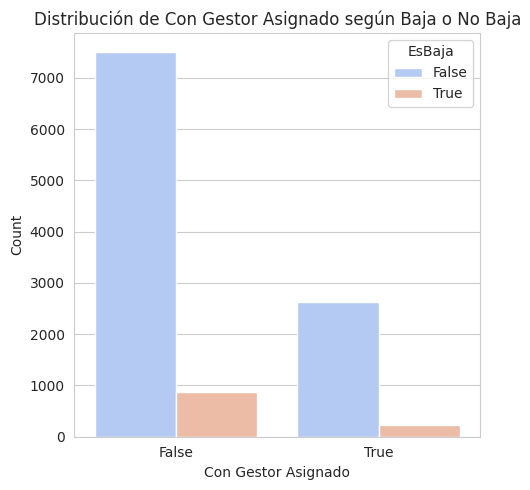

In [42]:
sns.set_style("whitegrid")
plt.figure(figsize=(5, 5))

# Graficar la proporción de cada valor en 'ConGestorSubAgente' según 'EsBaja'
sns.countplot(x='ConGestorSubAgente', hue='EsBaja', data=df, palette='coolwarm')
plt.xlabel('Con Gestor SubAgente')
plt.ylabel('Count')
plt.title('Distribución de Con Gestor SubAgente según Baja o No Baja')
plt.legend(title='EsBaja')
plt.tight_layout()
plt.show()

# Graficar la proporción de cada valor en 'ConGestorAsignado' según 'EsBaja'
plt.figure(figsize=(5, 5))
sns.set_style("whitegrid")
sns.countplot(x='ConGestorAsignado', hue='EsBaja', data=df, palette='coolwarm')
plt.xlabel('Con Gestor Asignado')
plt.ylabel('Count')
plt.title('Distribución de Con Gestor Asignado según Baja o No Baja')
plt.legend(title='EsBaja')
plt.tight_layout()
plt.show()

#Columnas 'sCodProvincia', 'sCodPostal'

In [43]:
df['sCodProvincia'] = df['sCodProvincia'].astype(int)

In [44]:
df = df.drop(columns=['sCodProvincia'])

La columna Provincia y la Postal arrojan

(-1.0999989714186922,
 1.0999986127884263,
 -1.0999997682473706,
 1.0999999889641605)

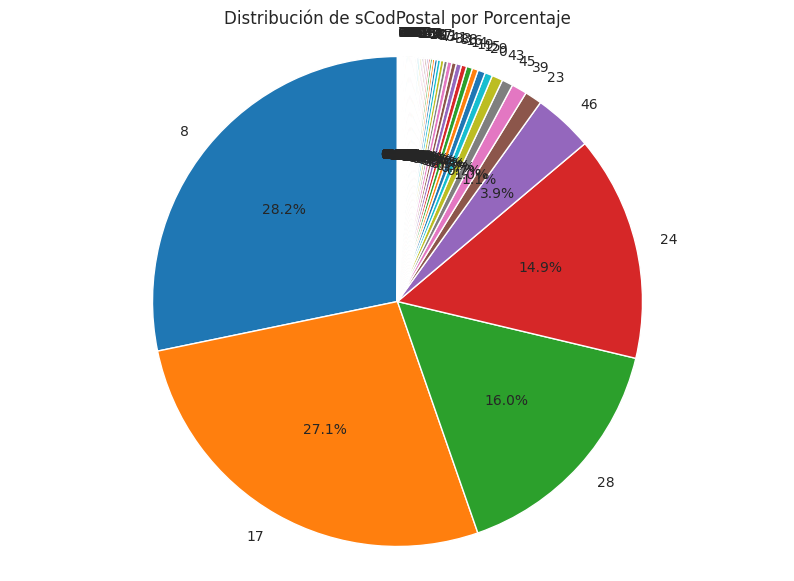

In [45]:
frecuencia_sCodPostal = df['sCodPostal'].value_counts()
porcentajes = frecuencia_sCodPostal / frecuencia_sCodPostal.sum() * 100
plt.figure(figsize=(10, 7))
plt.pie(porcentajes, labels=porcentajes.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de sCodPostal por Porcentaje')
plt.axis('equal')

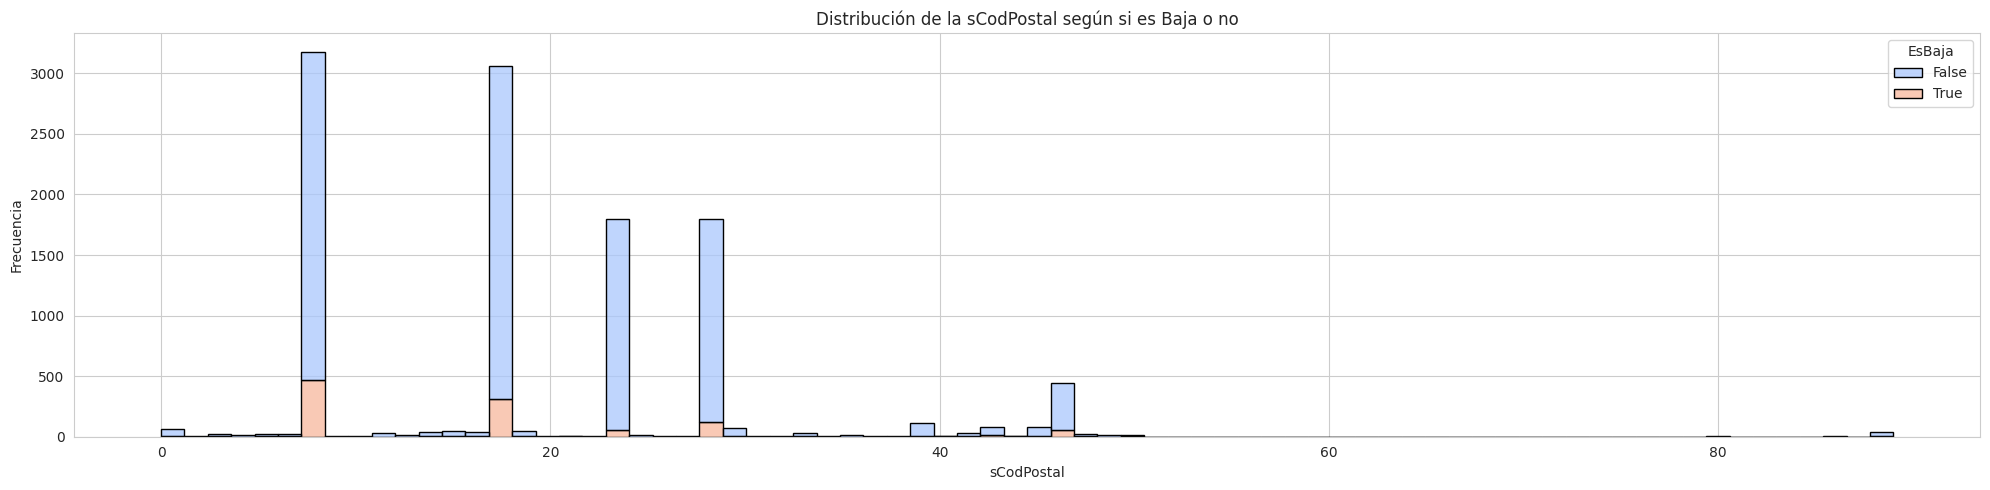

In [46]:
plt.figure(figsize=(20, 5))
sns.histplot(data=df, x='sCodPostal', bins=74, hue='EsBaja', palette='coolwarm', multiple='stack', edgecolor='black')

plt.xlabel('sCodPostal')
plt.ylabel('Frecuencia')
plt.title('Distribución de la sCodPostal según si es Baja o no')
plt.tight_layout()
plt.show()

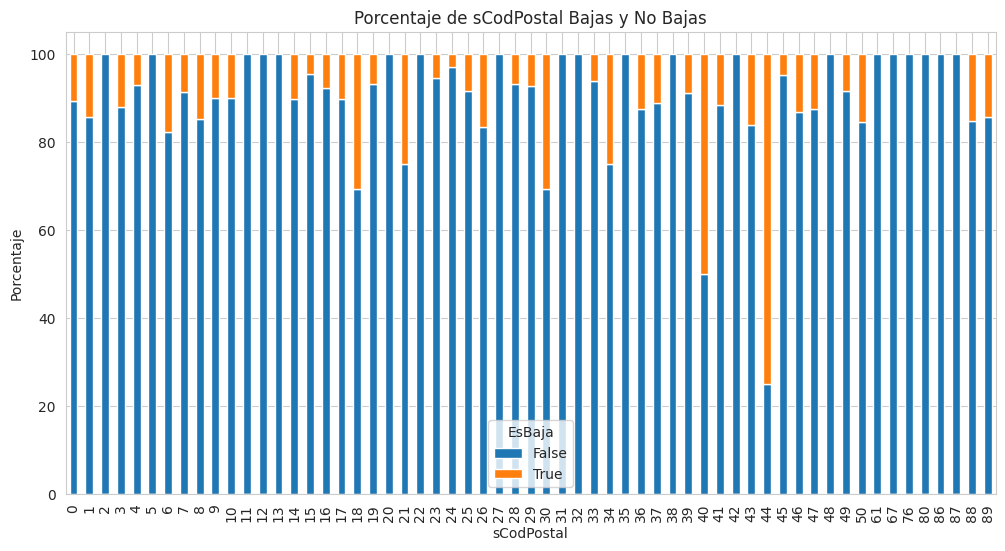

In [47]:
# Calcular el conteo de cada valor en la columna 'sCodPostal' para cada categoría de 'EsBaja'
conteo = df.groupby(['sCodPostal', 'EsBaja']).size().unstack(fill_value=0)

# Calcular el porcentaje de cada valor en la columna 'sCodPostal' para cada categoría de 'EsBaja'
porcentaje = conteo.div(conteo.sum(axis=1), axis=0) * 100

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(12, 6))
porcentaje.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Porcentaje de sCodPostal Bajas y No Bajas')
ax.set_xlabel('sCodPostal')
ax.set_ylabel('Porcentaje')
ax.legend(title='EsBaja')
plt.show()

#Columnas 'sNomEstadoCivil'

In [48]:
funciones.analizar_columna(df, 'sNomEstadoCivil')

[1, 2, 3, 4, 5, 6, 7]

Valor '1': 1571 registros

Valor '2': 3515 registros

Valor '3': 50 registros

Valor '4': 6024 registros

Valor '5': 10 registros

Valor '6': 18 registros

Valor '7': 56 registros

1    13.971896
2    31.261117
3     0.444682
4    53.575240
5     0.088936
6     0.160085
7     0.498043
Name: sNomEstadoCivil, dtype: float64


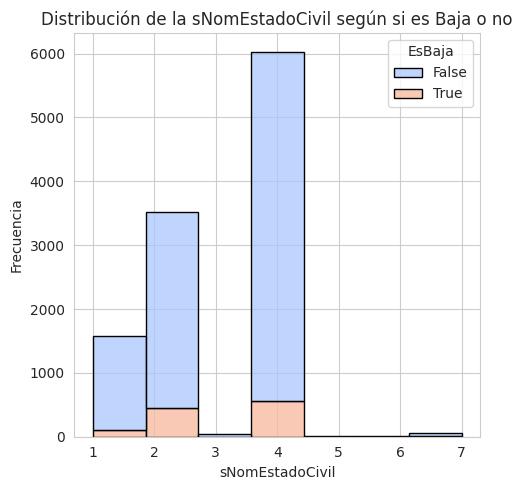

In [49]:
plt.figure(figsize=(5, 5))
sns.histplot(data=df, x='sNomEstadoCivil', bins=7, hue='EsBaja', palette='coolwarm', multiple='stack', edgecolor='black')
plt.xlabel('sNomEstadoCivil')
plt.ylabel('Frecuencia')
plt.title('Distribución de la sNomEstadoCivil según si es Baja o no')
plt.tight_layout()
plt.show()

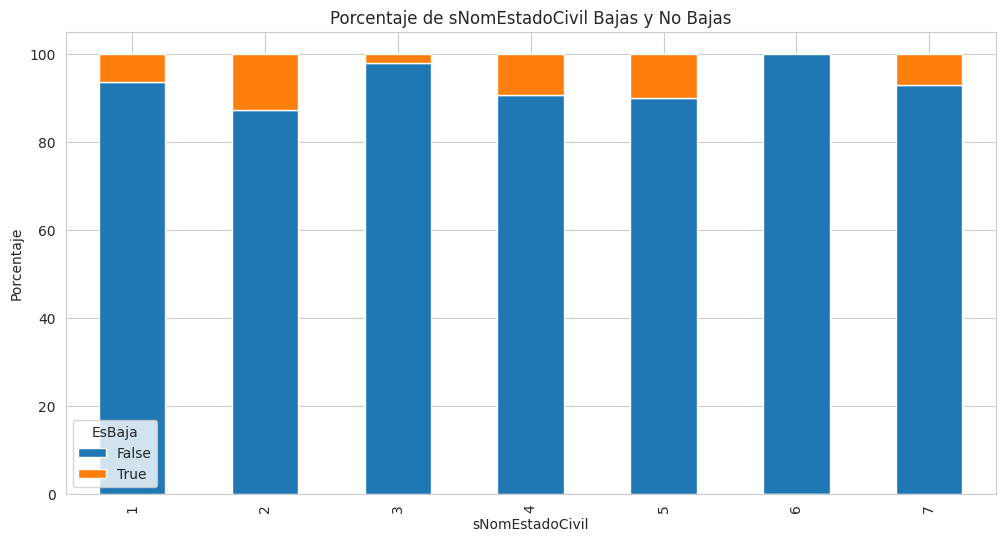

In [50]:
# Calcular el conteo de cada valor en la columna 'sNomEstadoCivil' para cada categoría de 'EsBaja'
conteo = df.groupby(['sNomEstadoCivil', 'EsBaja']).size().unstack(fill_value=0)

# Calcular el porcentaje de cada valor en la columna 'sNomEstadoCivil' para cada categoría de 'EsBaja'
porcentaje = conteo.div(conteo.sum(axis=1), axis=0) * 100

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(12, 6))
porcentaje.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Porcentaje de sNomEstadoCivil Bajas y No Bajas')
ax.set_xlabel('sNomEstadoCivil')
ax.set_ylabel('Porcentaje')
ax.legend(title='EsBaja')
plt.show()

# Columnas 'Dominio', 'SEXO', 'TipoPersona'

In [51]:
funciones.analizar_columna(df, 'Dominio')

[False, True]

Valor 'False': 5561 registros

Valor 'True': 5683 registros

False    49.457488
True     50.542512
Name: Dominio, dtype: float64


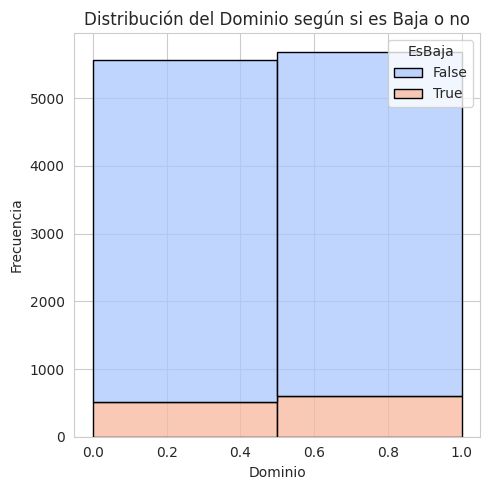

In [52]:
plt.figure(figsize=(5, 5))
sns.histplot(data=df, x='Dominio', bins=2, hue='EsBaja', palette='coolwarm', multiple='stack', edgecolor='black')
plt.xlabel('Dominio')
plt.ylabel('Frecuencia')
plt.title('Distribución del Dominio según si es Baja o no')
plt.tight_layout()
plt.show()

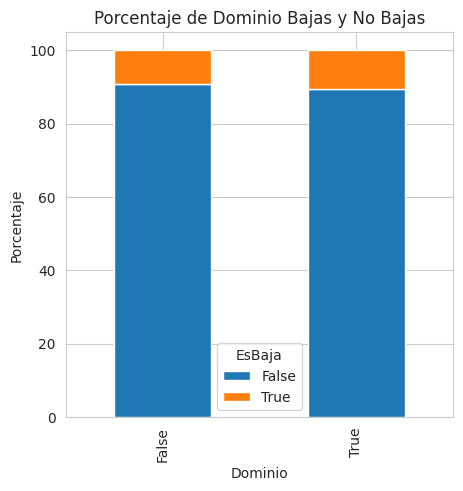

In [53]:
# Calcular el conteo de cada valor en la columna 'Dominio' para cada categoría de 'EsBaja'
conteo = df.groupby(['Dominio', 'EsBaja']).size().unstack(fill_value=0)

# Calcular el porcentaje de cada valor en la columna 'Dominio' para cada categoría de 'EsBaja'
porcentaje = conteo.div(conteo.sum(axis=1), axis=0) * 100

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(5, 5))
porcentaje.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Porcentaje de Dominio Bajas y No Bajas')
ax.set_xlabel('Dominio')
ax.set_ylabel('Porcentaje')
ax.legend(title='EsBaja')
plt.show()

In [54]:
"""Eliminamos la columna Dominio"""
df = df.drop(columns=['Dominio'])

In [55]:
funciones.analizar_columna(df, 'SEXO')

[1, 2, 3]

Valor '1': 5818 registros

Valor '2': 3037 registros

Valor '3': 2389 registros

1    51.743152
2    27.009961
3    21.246887
Name: SEXO, dtype: float64


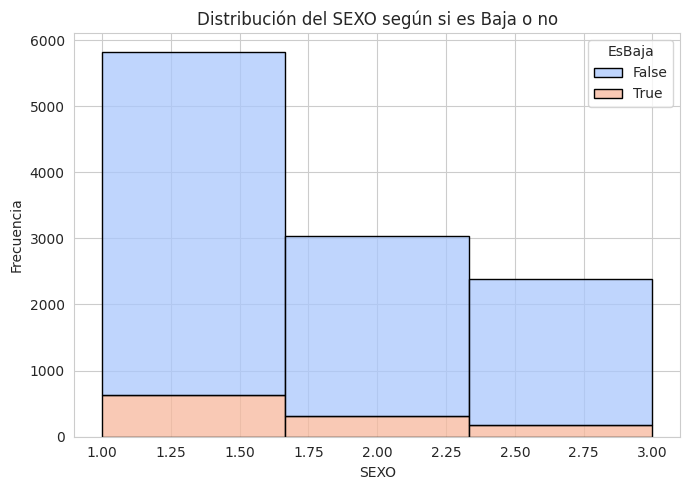

In [56]:
plt.figure(figsize=(7, 5))
sns.histplot(data=df, x='SEXO', bins=3, hue='EsBaja', palette='coolwarm', multiple='stack', edgecolor='black')
plt.xlabel('SEXO')
plt.ylabel('Frecuencia')
plt.title('Distribución del SEXO según si es Baja o no')
plt.tight_layout()
plt.show()

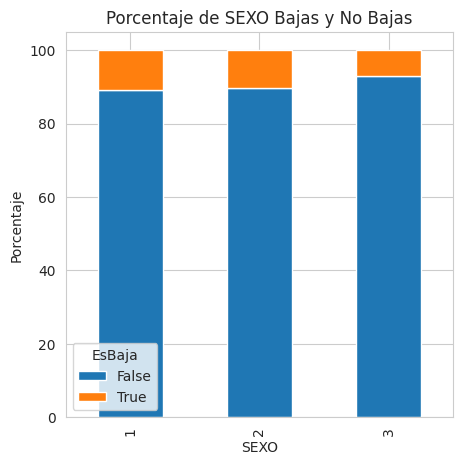

In [57]:
# Calcular el conteo de cada valor en la columna 'SEXO' para cada categoría de 'EsBaja'
conteo = df.groupby(['SEXO', 'EsBaja']).size().unstack(fill_value=0)

# Calcular el porcentaje de cada valor en la columna 'SEXO' para cada categoría de 'EsBaja'
porcentaje = conteo.div(conteo.sum(axis=1), axis=0) * 100

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(5, 5))
porcentaje.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Porcentaje de SEXO Bajas y No Bajas')
ax.set_xlabel('SEXO')
ax.set_ylabel('Porcentaje')
ax.legend(title='EsBaja')
plt.show()

#Columna TipoPersona

In [58]:
funciones.analizar_columna(df, 'TipoPersona')

[False, True]

Valor 'False': 1351 registros

Valor 'True': 9893 registros

False    12.015297
True     87.984703
Name: TipoPersona, dtype: float64


In [59]:
df['TipoPersona'] = df['TipoPersona'].astype(int)

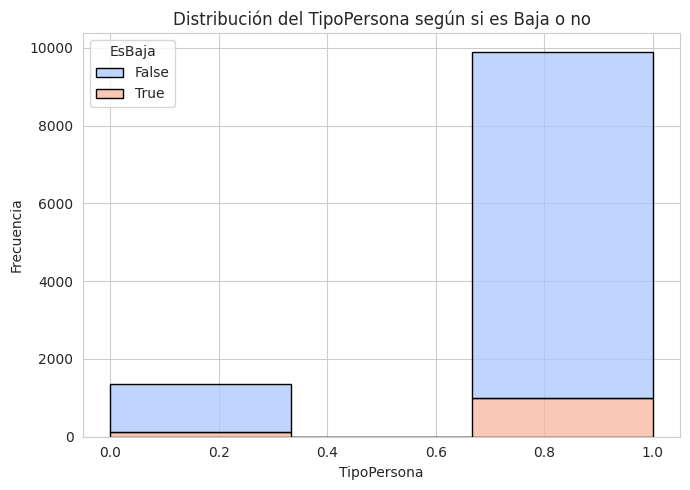

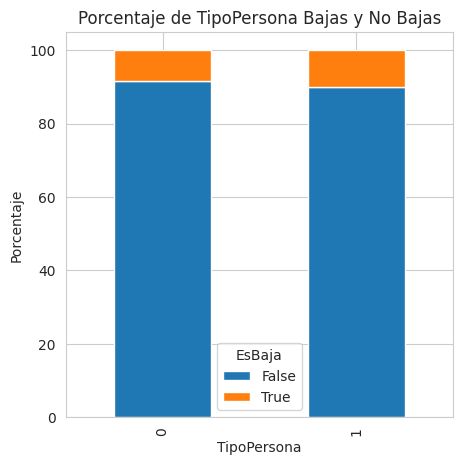

In [60]:
plt.figure(figsize=(7, 5))
sns.histplot(data=df, x='TipoPersona', bins=3, hue='EsBaja', palette='coolwarm', multiple='stack', edgecolor='black')
plt.xlabel('TipoPersona')
plt.ylabel('Frecuencia')
plt.title('Distribución del TipoPersona según si es Baja o no')
plt.tight_layout()
plt.show()


conteo = df.groupby(['TipoPersona', 'EsBaja']).size().unstack(fill_value=0)
porcentaje = conteo.div(conteo.sum(axis=1), axis=0) * 100
fig, ax = plt.subplots(figsize=(5, 5))
porcentaje.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Porcentaje de TipoPersona Bajas y No Bajas')
ax.set_xlabel('TipoPersona')
ax.set_ylabel('Porcentaje')
ax.legend(title='EsBaja')
plt.show()

#Columnas Menos0

In [61]:
grupo_0 = ['Num_Pol_Vigor_Menos0', 'NumeRecibos_Menos0', 'PrimasPagadas_Menos0',
           'Num_Siniestros_Menos0', 'Num_Pol_Vigor_Hogar_Menos0',
           'Num_Pol_Vigor_Autos_Menos0', 'Num_Pol_Vigor_Decesos_Menos0',
           'Num_Pol_Vigor_Salud_Menos0', 'Num_Pol_Vigor_PensionesVida_Menos0',
           'Num_Pol_Vigor_Resto_Menos0']

#Columnas 'Num_Pol_Vigor_Menos0'

In [62]:
funciones.analizar_columna(df, 'Num_Pol_Vigor_Menos0')

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 26, 29, 35, 38, 42]

Valor '0': 1116 registros

Valor '1': 6942 registros

Valor '2': 1692 registros

Valor '3': 665 registros

Valor '4': 350 registros

Valor '5': 162 registros

Valor '6': 111 registros

Valor '7': 58 registros

Valor '8': 38 registros

Valor '9': 22 registros

Valor '10': 17 registros

Valor '11': 18 registros

Valor '12': 10 registros

Valor '13': 5 registros

Valor '14': 6 registros

Valor '15': 3 registros

Valor '16': 5 registros

Valor '17': 2 registros

Valor '18': 3 registros

Valor '19': 6 registros

Valor '20': 1 registros

Valor '21': 1 registros

Valor '22': 4 registros

Valor '23': 1 registros

Valor '26': 2 registros

Valor '29': 1 registros

Valor '35': 1 registros

Valor '38': 1 registros

Valor '42': 1 registros

0      9.925293
1     61.739594
2     15.048026
3      5.914265
4      3.112771
5      1.440768
6      0.987193
7      0.515831
8      0.337958
9      0.1

In [63]:
valores_unicos_grupo = df['grupo'].unique()

for grupo in valores_unicos_grupo:
    df_filtrado = df[(df['Num_Pol_Vigor_Menos0'] > 10) & (df['grupo'] == grupo)]

    print(f'Valores para el grupo {grupo} cuando Num_Pol_Vigor_Menos0 > 10:')
    print(df_filtrado[['grupo', 'Num_Pol_Vigor_Menos0']])

Valores para el grupo GES0 cuando Num_Pol_Vigor_Menos0 > 10:
     grupo  Num_Pol_Vigor_Menos0
21    GES0                    13
97    GES0                    14
99    GES0                    11
101   GES0                    42
104   GES0                    14
122   GES0                    11
152   GES0                    11
154   GES0                    12
197   GES0                    22
265   GES0                    11
268   GES0                    17
279   GES0                    11
374   GES0                    11
445   GES0                    11
607   GES0                    19
745   GES0                    18
1164  GES0                    12
1384  GES0                    11
1668  GES0                    12
Valores para el grupo TUR0 cuando Num_Pol_Vigor_Menos0 > 10:
     grupo  Num_Pol_Vigor_Menos0
2038  TUR0                    21
2485  TUR0                    18
2489  TUR0                    20
2490  TUR0                    15
Valores para el grupo ALC0 cuando Num_Pol_Vigor_Menos

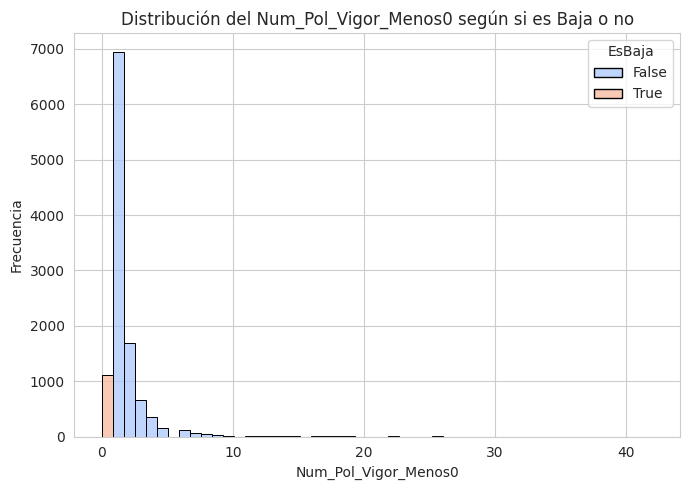

In [64]:
plt.figure(figsize=(7, 5))
sns.histplot(data=df, x='Num_Pol_Vigor_Menos0', bins=50, hue='EsBaja', palette='coolwarm', multiple='stack', edgecolor='black')
plt.xlabel('Num_Pol_Vigor_Menos0')
plt.ylabel('Frecuencia')
plt.title('Distribución del Num_Pol_Vigor_Menos0 según si es Baja o no')
plt.tight_layout()
plt.show()

In [65]:
# Filtrar el DataFrame para aquellos valores donde 'EsBaja' es igual a 1
df_esbaja_1 = df[df['EsBaja'] == 1]
valores_con_esbaja_1 = df_esbaja_1['Num_Pol_Vigor_Menos0'].unique()
print("Valores de 'Num_Pol_Vigor_Menos0' donde 'EsBaja' es igual a 1:")
print(valores_con_esbaja_1)

total_esbaja_1 = len(df_esbaja_1)

if total_esbaja_1 == 1:
    valor_esbaja_1 = df_esbaja_1['Num_Pol_Vigor_Menos0'].iloc[0]
    print("El valor en 'Num_Pol_Vigor_Menos0' donde 'EsBaja' es igual a 1 es:", valor_esbaja_1)
    print("Número total de valores en 'EsBaja' que son iguales a 1:", total_esbaja_1)
else:
    print("Número total de valores en 'EsBaja' que son iguales a 1:", total_esbaja_1)

Valores de 'Num_Pol_Vigor_Menos0' donde 'EsBaja' es igual a 1:
[0]
Número total de valores en 'EsBaja' que son iguales a 1: 1116


# COLUMNA 'NumeRecibos_Menos0'

In [66]:
funciones.analizar_columna(df, 'NumeRecibos_Menos0')

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37, 38, 39, 40, 41, 43, 44, 45, 46, 47, 48, 50, 52, 53, 54, 61, 62, 64, 70, 73, 74, 78, 79, 84, 85, 93, 104, 124, 169]

Valor '0': 1297 registros

Valor '1': 4632 registros

Valor '2': 2081 registros

Valor '3': 892 registros

Valor '4': 699 registros

Valor '5': 254 registros

Valor '6': 232 registros

Valor '7': 107 registros

Valor '8': 103 registros

Valor '9': 67 registros

Valor '10': 38 registros

Valor '11': 40 registros

Valor '12': 376 registros

Valor '13': 81 registros

Valor '14': 55 registros

Valor '15': 32 registros

Valor '16': 28 registros

Valor '17': 14 registros

Valor '18': 13 registros

Valor '19': 17 registros

Valor '20': 18 registros

Valor '21': 9 registros

Valor '22': 9 registros

Valor '23': 7 registros

Valor '24': 29 registros

Valor '25': 8 registros

Valor '26': 9 registros

Valor '27': 10 registros

Valor '28': 11 regi

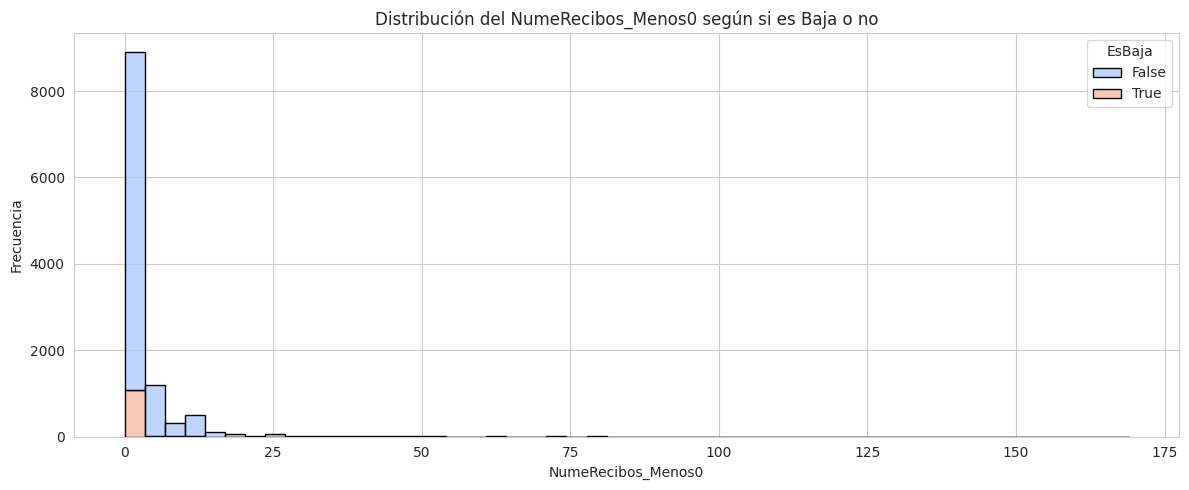

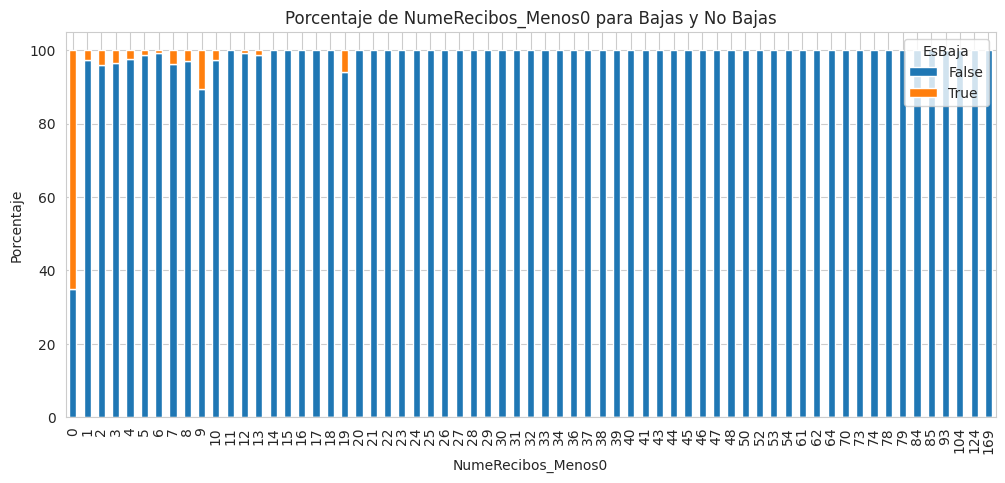

In [67]:
c = 'NumeRecibos_Menos0'

plt.figure(figsize=(12, 5))
sns.histplot(data=df, x=c, bins=50, hue='EsBaja', palette='coolwarm', multiple='stack', edgecolor='black')
plt.xlabel(c)
plt.ylabel('Frecuencia')
plt.title(f'Distribución del {c} según si es Baja o no')
plt.tight_layout()
plt.show()

conteo = df.groupby([c, 'EsBaja']).size().unstack(fill_value=0)
porcentaje = conteo.div(conteo.sum(axis=1), axis=0) * 100
fig, ax = plt.subplots(figsize=(12, 5))
porcentaje.plot(kind='bar', stacked=True, ax=ax)
ax.set_title(f'Porcentaje de {c} para Bajas y No Bajas')
ax.set_xlabel(c)
ax.set_ylabel('Porcentaje')
ax.legend(title='EsBaja')
plt.show()

In [68]:
# Calcular estadísticas descriptivas para ambas columnas
estadisticas_NumeRecibos = df['NumeRecibos_Menos0'].describe()
estadisticas_Num_Pol_Vigor = df['Num_Pol_Vigor_Menos0'].describe()

print("Estadísticas de 'NumeRecibos_Menos0':")
print(estadisticas_NumeRecibos)
print("\nEstadísticas de 'Num_Pol_Vigor_Menos0':")
print(estadisticas_Num_Pol_Vigor)

Estadísticas de 'NumeRecibos_Menos0':
count    11244.000000
mean         3.035130
std          5.559916
min          0.000000
25%          1.000000
50%          1.000000
75%          3.000000
max        169.000000
Name: NumeRecibos_Menos0, dtype: float64

Estadísticas de 'Num_Pol_Vigor_Menos0':
count    11244.000000
mean         1.549004
std          1.798336
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         42.000000
Name: Num_Pol_Vigor_Menos0, dtype: float64


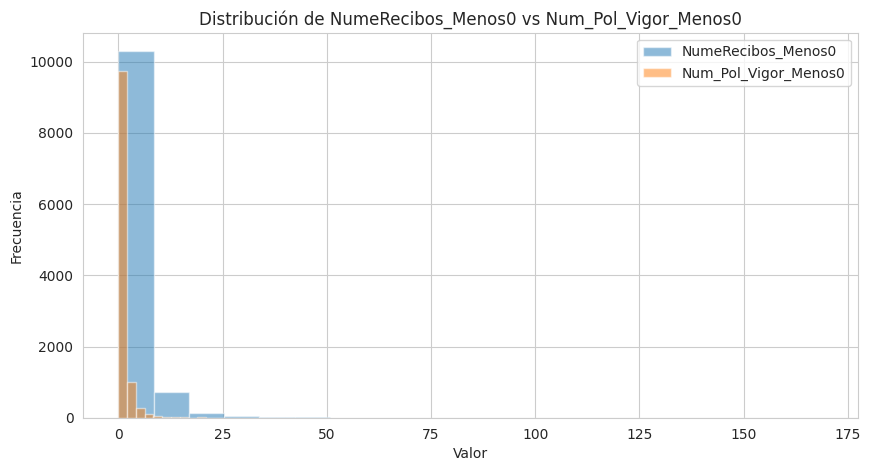

In [69]:
# Visualización de las distribuciones de ambas columnas
plt.figure(figsize=(10, 5))
plt.hist(df['NumeRecibos_Menos0'], bins=20, alpha=0.5, label='NumeRecibos_Menos0')
plt.hist(df['Num_Pol_Vigor_Menos0'], bins=20, alpha=0.5, label='Num_Pol_Vigor_Menos0')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Distribución de NumeRecibos_Menos0 vs Num_Pol_Vigor_Menos0')
plt.legend()
plt.show()

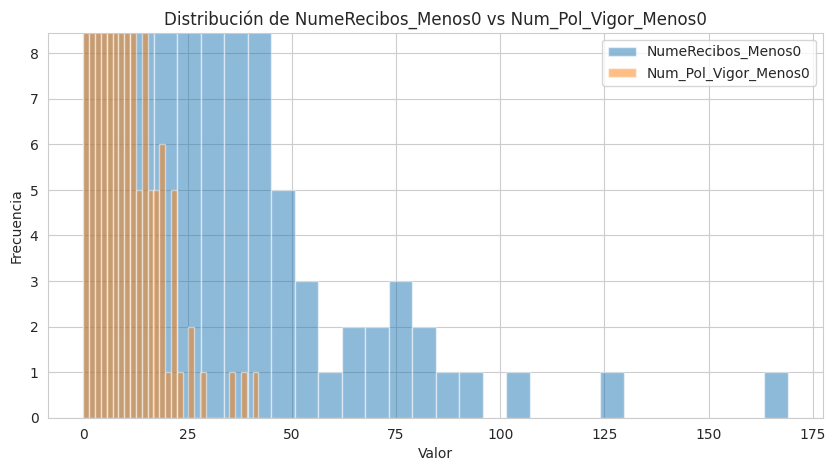

In [70]:
# Obtener el valor máximo de ambas columnas
max_value = max(df['NumeRecibos_Menos0'].max(), df['Num_Pol_Vigor_Menos0'].max())

plt.figure(figsize=(10, 5))
plt.hist(df['NumeRecibos_Menos0'], bins=30, alpha=0.5, label='NumeRecibos_Menos0')
plt.hist(df['Num_Pol_Vigor_Menos0'], bins=30, alpha=0.5, label='Num_Pol_Vigor_Menos0')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Distribución de NumeRecibos_Menos0 vs Num_Pol_Vigor_Menos0')
plt.legend()

# Establecer el límite superior del eje
plt.ylim(0, max_value * 0.05)

plt.show()

#Columna PrimasPagadas_Menos0

Hay que valorar la posibilidad de hacer una discretizacion de variables.

Crearia una nueva columna con cada una.

In [71]:
df['PrimasPagadas_Menos0'].describe()

count    11244.000000
mean       636.180174
std       1138.525905
min          0.000000
25%        194.147500
50%        370.480000
75%        643.800000
max      19685.160000
Name: PrimasPagadas_Menos0, dtype: float64

In [72]:
# Crear el scatter plot
scatter_plot = go.Scatter(x=df.index, y=df['PrimasPagadas_Menos0'], mode='markers', marker=dict(color='blue', size=5, opacity=0.5))

layout = go.Layout(title='Scatter Plot de PrimasPagadas_Menos0',
                   xaxis=dict(title='Índice de la fila'),
                   yaxis=dict(title='PrimasPagadas_Menos0'))

fig = go.Figure(data=[scatter_plot], layout=layout)
fig.show()

In [73]:
azul_rgb = 'rgb(173, 216, 230)'
colores = [azul_rgb if es_baja == 0 else 'red' for es_baja in df['EsBaja']]
scatter_plot = go.Scatter(x=df.index, y=df['PrimasPagadas_Menos0'], mode='markers',
                          marker=dict(color=colores, size=5, opacity=0.5))

layout = go.Layout(title='Scatter Plot de PrimasPagadas_Menos0',
                   xaxis=dict(title='Índice de la fila'),
                   yaxis=dict(title='PrimasPagadas_Menos0'))

fig = go.Figure(data=[scatter_plot], layout=layout)
fig.show()

In [74]:
fig = make_subplots(rows=4, cols=1, shared_xaxes=True, vertical_spacing=0.05)

colores = ['blue', 'red', 'green', 'orange']
for i, columna in enumerate(['PrimasPagadas_Menos0', 'PrimasPagadas_Menos1', 'PrimasPagadas_Menos2', 'PrimasPagadas_Menos3']):
    scatter_plot = go.Scatter(x=df.index, y=df[columna], mode='markers', marker=dict(color=colores[i], size=5, opacity=0.5), name=columna)
    fig.add_trace(scatter_plot, row=i+1, col=1)
fig.update_layout(title='Gráficas de dispersión de Primas Pagadas Menos X',
                  xaxis=dict(title='Índice de la fila'),
                  yaxis=dict(title='Valor'),
                  height=800)
fig.show()

In [75]:
scatter_plots = []
colores = ['blue', 'red', 'green', 'orange']

for i, columna in enumerate(['PrimasPagadas_Menos0', 'PrimasPagadas_Menos1', 'PrimasPagadas_Menos2', 'PrimasPagadas_Menos3']):
    scatter_plot = go.Scatter(x=df.index, y=df[columna], mode='markers',
                              marker=dict(color=colores[i], size=5, opacity=0.5),
                              name=columna)
    scatter_plots.append(scatter_plot)

fig = make_subplots(rows=4, cols=1, shared_xaxes=True, vertical_spacing=0.05)

for scatter_plot in scatter_plots:
    fig.add_trace(scatter_plot, row=scatter_plots.index(scatter_plot) + 1, col=1)

fig.update_layout(title='Scatter Plots de PrimasPagadas_MenosX',
                  xaxis=dict(title='Índice de la fila'),
                  height=1200)
fig.show()

#Columnas 'Num_Pol_Vigor_Hogar_Menos0'

In [76]:
funciones.analizar_columna(df, 'Num_Pol_Vigor_Hogar_Menos0')

[False, True]

Valor 'False': 9890 registros

Valor 'True': 1354 registros

False    87.958022
True     12.041978
Name: Num_Pol_Vigor_Hogar_Menos0, dtype: float64


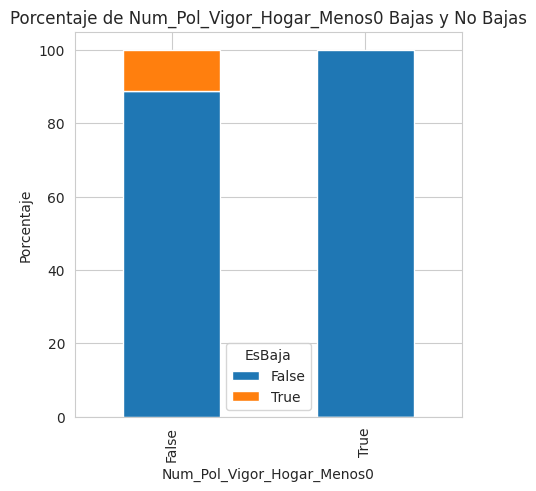

In [77]:
conteo = df.groupby(['Num_Pol_Vigor_Hogar_Menos0', 'EsBaja']).size().unstack(fill_value=0)

porcentaje = conteo.div(conteo.sum(axis=1), axis=0) * 100

fig, ax = plt.subplots(figsize=(5, 5))
porcentaje.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Porcentaje de Num_Pol_Vigor_Hogar_Menos0 Bajas y No Bajas')
ax.set_xlabel('Num_Pol_Vigor_Hogar_Menos0')
ax.set_ylabel('Porcentaje')
ax.legend(title='EsBaja')
plt.show()

#Columnas 'Num_Pol_Vigor_Autos_Menos0'

In [78]:
funciones.analizar_columna(df, 'Num_Pol_Vigor_Autos_Menos0')

[False, True]

Valor 'False': 5594 registros

Valor 'True': 5650 registros

False    49.750978
True     50.249022
Name: Num_Pol_Vigor_Autos_Menos0, dtype: float64


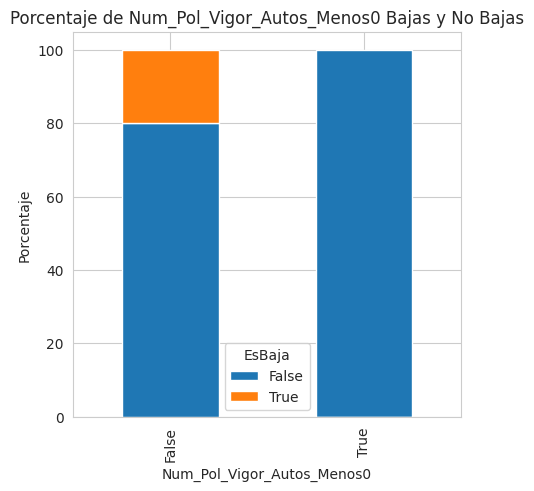

In [79]:
conteo = df.groupby(['Num_Pol_Vigor_Autos_Menos0', 'EsBaja']).size().unstack(fill_value=0)

porcentaje = conteo.div(conteo.sum(axis=1), axis=0) * 100

fig, ax = plt.subplots(figsize=(5, 5))
porcentaje.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Porcentaje de Num_Pol_Vigor_Autos_Menos0 Bajas y No Bajas')
ax.set_xlabel('Num_Pol_Vigor_Autos_Menos0')
ax.set_ylabel('Porcentaje')
ax.legend(title='EsBaja')
plt.show()

#Columnas Num_Pol_Vigor_Decesos_Menos0

In [80]:
funciones.analizar_columna(df, 'Num_Pol_Vigor_Decesos_Menos0')

[False, True]

Valor 'False': 11004 registros

Valor 'True': 240 registros

False    97.865528
True      2.134472
Name: Num_Pol_Vigor_Decesos_Menos0, dtype: float64


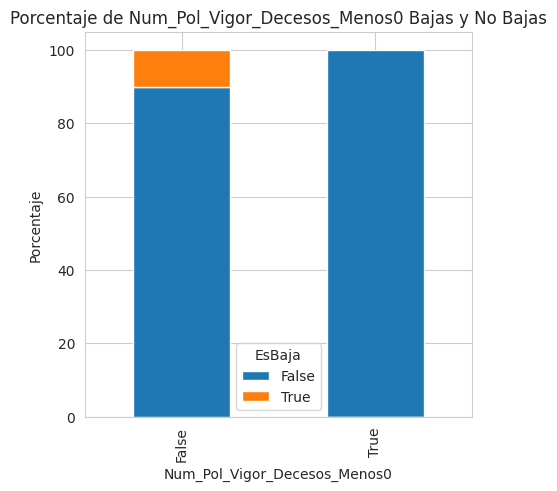

In [81]:
conteo = df.groupby(['Num_Pol_Vigor_Decesos_Menos0', 'EsBaja']).size().unstack(fill_value=0)

porcentaje = conteo.div(conteo.sum(axis=1), axis=0) * 100

fig, ax = plt.subplots(figsize=(5, 5))
porcentaje.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Porcentaje de Num_Pol_Vigor_Decesos_Menos0 Bajas y No Bajas')
ax.set_xlabel('Num_Pol_Vigor_Decesos_Menos0')
ax.set_ylabel('Porcentaje')
ax.legend(title='EsBaja')
plt.show()

#Columnas Num_Pol_Vigor_Salud_Menos0

In [82]:
funciones.analizar_columna(df, 'Num_Pol_Vigor_Salud_Menos0')

[False, True]

Valor 'False': 10632 registros

Valor 'True': 612 registros

False    94.557097
True      5.442903
Name: Num_Pol_Vigor_Salud_Menos0, dtype: float64


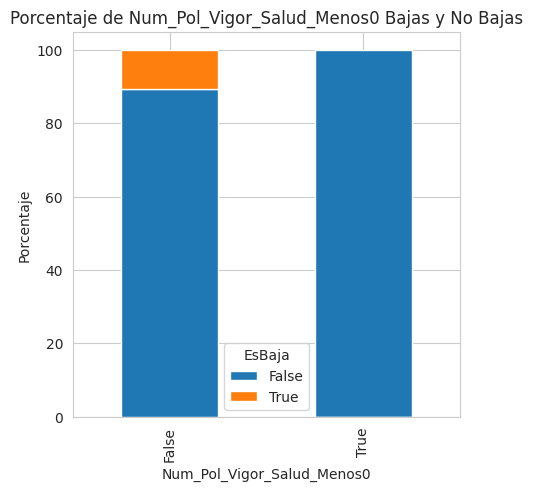

In [83]:
conteo = df.groupby(['Num_Pol_Vigor_Salud_Menos0', 'EsBaja']).size().unstack(fill_value=0)

porcentaje = conteo.div(conteo.sum(axis=1), axis=0) * 100

fig, ax = plt.subplots(figsize=(5, 5))
porcentaje.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Porcentaje de Num_Pol_Vigor_Salud_Menos0 Bajas y No Bajas')
ax.set_xlabel('Num_Pol_Vigor_Salud_Menos0')
ax.set_ylabel('Porcentaje')
ax.legend(title='EsBaja')
plt.show()

#Columnas 'Num_Pol_Vigor_PensionesVida_Menos0'

In [84]:
funciones.analizar_columna(df, 'Num_Pol_Vigor_PensionesVida_Menos0')

[False, True]

Valor 'False': 10584 registros

Valor 'True': 660 registros

False    94.130203
True      5.869797
Name: Num_Pol_Vigor_PensionesVida_Menos0, dtype: float64


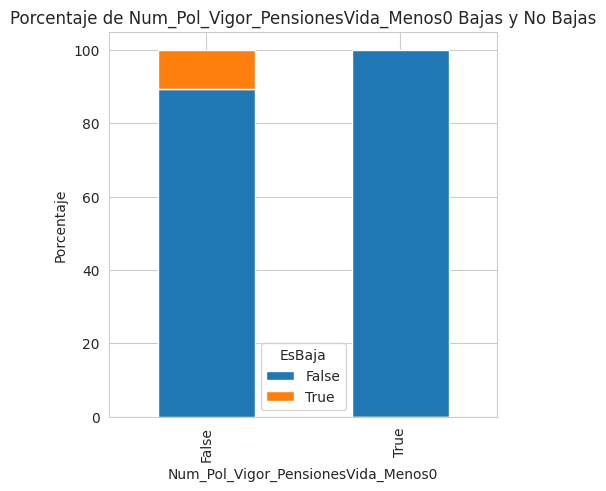

In [85]:
conteo = df.groupby(['Num_Pol_Vigor_PensionesVida_Menos0', 'EsBaja']).size().unstack(fill_value=0)

porcentaje = conteo.div(conteo.sum(axis=1), axis=0) * 100

fig, ax = plt.subplots(figsize=(5, 5))
porcentaje.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Porcentaje de Num_Pol_Vigor_PensionesVida_Menos0 Bajas y No Bajas')
ax.set_xlabel('Num_Pol_Vigor_PensionesVida_Menos0')
ax.set_ylabel('Porcentaje')
ax.legend(title='EsBaja')
plt.show()

#Columnas 'Num_Pol_Vigor_Resto_Menos0'

In [86]:
funciones.analizar_columna(df, 'Num_Pol_Vigor_Resto_Menos0')

[False, True]

Valor 'False': 7090 registros

Valor 'True': 4154 registros

False    63.055852
True     36.944148
Name: Num_Pol_Vigor_Resto_Menos0, dtype: float64


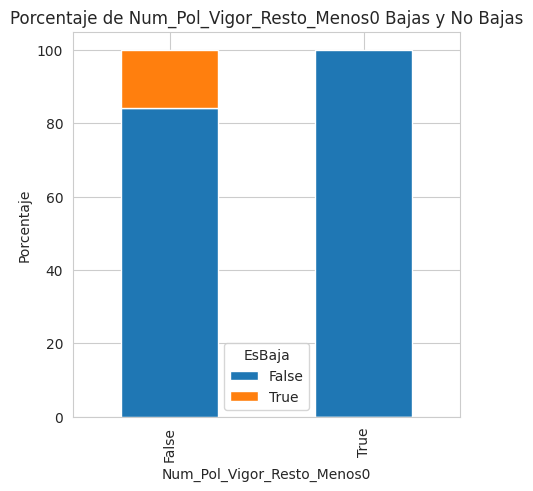

In [87]:
conteo = df.groupby(['Num_Pol_Vigor_Resto_Menos0', 'EsBaja']).size().unstack(fill_value=0)

porcentaje = conteo.div(conteo.sum(axis=1), axis=0) * 100

fig, ax = plt.subplots(figsize=(5, 5))
porcentaje.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Porcentaje de Num_Pol_Vigor_Resto_Menos0 Bajas y No Bajas')
ax.set_xlabel('Num_Pol_Vigor_Resto_Menos0')
ax.set_ylabel('Porcentaje')
ax.legend(title='EsBaja')
plt.show()

In [88]:
columnas = ['Num_Pol_Vigor_Hogar_Menos0', 'Num_Pol_Vigor_Autos_Menos0',
            'Num_Pol_Vigor_Decesos_Menos0', 'Num_Pol_Vigor_Salud_Menos0',
            'Num_Pol_Vigor_PensionesVida_Menos0', 'Num_Pol_Vigor_Resto_Menos0']

conteos = []

for columna in columnas:
    conteo = df[columna].value_counts()
    conteos.append(conteo)
fig = go.Figure()

for i, columna in enumerate(columnas):
    fig.add_trace(go.Bar(x=conteos[i].index, y=conteos[i], name=columna))

fig.update_layout(title='Conteo de valores únicos en las columnas especificadas',
                  xaxis=dict(title='Valor'),
                  yaxis=dict(title='Conteo'),
                  barmode='group')
fig.show()

In [89]:
conteos_false_baja = []
conteos_false_no_baja = []

# Calcular el conteo de clientes False en cada columna para 'EsBaja' True y False
for columna in columnas:
    conteo_false_baja = (df['EsBaja'] == 1) & (df[columna] == 0)
    conteos_false_baja.append(conteo_false_baja.sum())
    conteo_false_no_baja = (df['EsBaja'] == 0) & (df[columna] == 0)
    conteos_false_no_baja.append(conteo_false_no_baja.sum())

fig = go.Figure()
fig.add_trace(go.Bar(x=columnas, y=conteos_false_baja, name='EsBaja=True', marker_color='red'))
fig.add_trace(go.Bar(x=columnas, y=conteos_false_no_baja, name='EsBaja=False', marker_color='blue'))

fig.update_layout(title='Número de clientes con valor False en cada columna según EsBaja',
                  xaxis=dict(title='Columna'),
                  yaxis=dict(title='Número de clientes False'),
                  barmode='group')

fig.show()

In [90]:
df['Total_Polizas_Vigor'] = df[columnas].sum(axis=1)
clientes_con_polizas_vigor = (df['Total_Polizas_Vigor'] >= 1).sum()
print(f"Clientes con 1 o más pólizas en vigor: {clientes_con_polizas_vigor}")

Clientes con 1 o más pólizas en vigor: 10104


In [91]:
df['Total_Polizas_Vigor'] = df[columnas].sum(axis=1)
clientes_con_mas_de_una_poliza = (df['Total_Polizas_Vigor'] > 1).sum()
print(f"Clientes con pólizas de varios tipos en vigor: {clientes_con_mas_de_una_poliza}")

Clientes con pólizas de varios tipos en vigor: 2019


In [92]:
columnas_eliminar = ['grupo', 'Total_Polizas_Vigor', 'ConGestorSubAgente', 'ConGestorAsignado']
df = df.drop(columnas_eliminar, axis=1)

In [93]:
le = LabelEncoder()
df['MEDCOD'] =le.fit_transform(df['MEDCOD'])

In [94]:
df.shape

(11244, 48)

###OVER SAMPLING metodo SMOTE

In [95]:
X = df.drop('EsBaja', axis=1)  # todas las columnas excepto la variable objetivo
y = df['EsBaja']  # variable objetivo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplica SMOTE al conjunto
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [96]:
print("Clases antes de SMOTE:", y_train.value_counts())
print("Clases después de SMOTE:", pd.Series(y_train_resampled).value_counts())

Clases antes de SMOTE: False    8089
True      906
Name: EsBaja, dtype: int64
Clases después de SMOTE: False    8089
True     8089
Name: EsBaja, dtype: int64


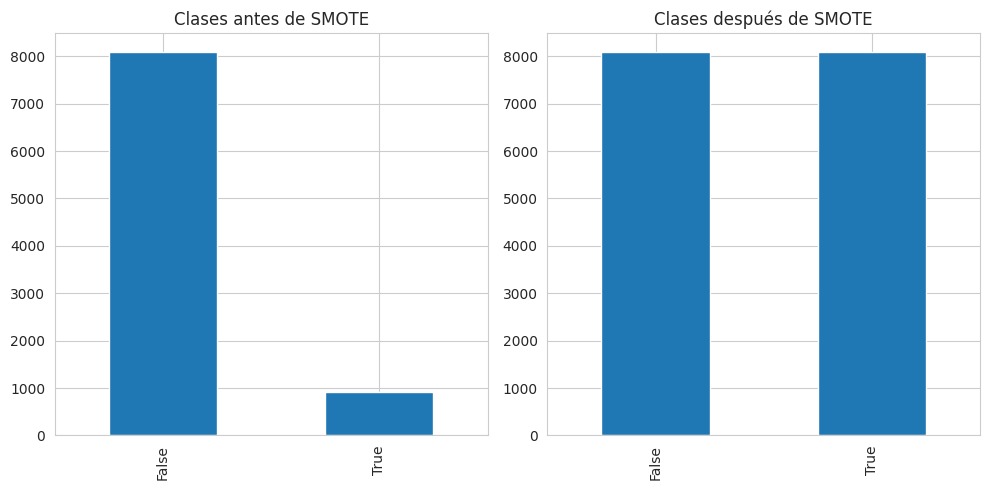

In [97]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Clases antes de SMOTE')
y_train.value_counts().plot(kind='bar')

plt.subplot(1, 2, 2)
plt.title('Clases después de SMOTE')
pd.Series(y_train_resampled).value_counts().plot(kind='bar')

plt.tight_layout()
plt.show()

In [98]:
#Formamos el dataframe de nuevo.
df = pd.DataFrame(X_train_resampled, columns=X.columns)
df['EsBaja'] = y_train_resampled

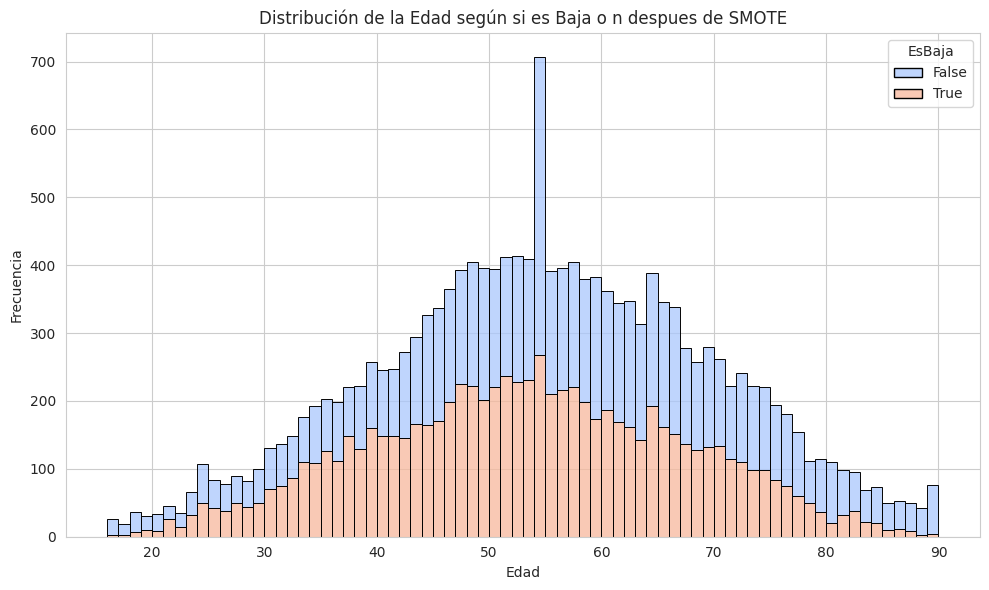

In [99]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Edad', bins=74, hue='EsBaja', palette='coolwarm', multiple='stack', edgecolor='black')

plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Edad según si es Baja o n despues de SMOTE')

plt.tight_layout()
plt.show()

# GUARDADO DEL DATAFRAME LIMPIO

In [100]:
ruta_archivo_csv = '/content/drive/MyDrive/Churn Rate Algorithm/dfclean.csv'
df.to_csv(ruta_archivo_csv, index=False)
print(f"El DataFrame se ha guardado correctamente en el archivo '{ruta_archivo_csv}'.")

El DataFrame se ha guardado correctamente en el archivo '/content/drive/MyDrive/Churn Rate Algorithm/dfclean.csv'.
